# Editor

## Importation de bibliothèques et fonctions

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline  
plt.rcParams['axes.axisbelow'] = True

import os
import pandas as pd
import numpy as np
import seaborn as sns
import warnings

from numpy.linalg import inv
from numpy.linalg import norm
from numpy.linalg import pinv
from numpy.linalg import svd

from scipy import sparse

## Fonctions utiles

**Fonction pour génerer un siganl de taille N**

In [2]:
#Fonction pour génerer le signal 
def generate_a_signal(N):
    fig, (ax1, ax2,ax3) = plt.subplots(3, 1,figsize=(18,12))

    # Echantillonnage
    fe = 430 # freq d'échantill
    t = np.array([i/fe for i in range(N)])

    # Sinus
    f0 = 50
    sinus = np.sin(2*np.pi*f0*t)

    ax1.grid()
    ax1.plot(t,sinus)
    ax1.title.set_text("sin(2*np.pi*f0*t)")

    # Porteuse 
    fp = 100
    porteuse=np.cos(2*np.pi*fp*t)

    ax2.grid()
    ax2.plot(t,porteuse)
    ax2.title.set_text("cos(2*np.pi*fp*t)")

    # Génération du signal
    x=porteuse*sinus # Multiplication terme à terme du sinus et de la porteuse

    ax3.grid()
    ax3.plot(t,x,"r-")
    ax3.title.set_text("signal x (=porteuse*sinus)")
    # Affichage signal d'origine

    fig.tight_layout()
    plt.show()
    return x

**Fonction pour afficher un signal et l'histograme de ses composantes**

In [3]:
def graph_signal(alpha,c="red", titles = [""],print_histogramme = True, complex_number = False):

    plt.figure(figsize=(17,12))
    grid = plt.GridSpec(2, 4, wspace=0.4, hspace=0.2)


    plt.subplot(grid[0,:])
    # Afficher de la représentation parcimonieuse alpha
    plt.grid()
    if complex_number:
        plt.plot(np.real(alpha), "-",color=c, label="réelle")
        plt.plot(np.imag(alpha), "--",color="orange", label="imaginaire")
        plt.legend()
    else:
        plt.plot(alpha, "-",color=c)
    
    plt.title(titles[0])
    
    # Histogramme
    if print_histogramme:
        
        your_bins = 15
        
        if complex_number:
      
            plt.subplot(grid[1,:2])
            plt.grid()

            arr = plt.hist(np.real(alpha), rwidth=0.95, color="slategrey", bins=your_bins)
            for i in range(your_bins):
                nb = int(arr[0][i])
                if nb > 0:
                    plt.text(arr[1][i],nb,str(nb),c=c,fontsize=15)
        
            plt.title(f"Distribution des composantes de {titles[0]}\n (partie réelle)")

            plt.subplot(grid[1,2:])
            plt.grid()

            arr = plt.hist(np.imag(alpha), rwidth=0.95, color="slategrey", bins=your_bins)
            for i in range(your_bins):
                nb = int(arr[0][i])
                if nb > 0:
                    plt.text(arr[1][i],nb,str(nb),c="orange",fontsize=15)
        
            plt.title(f"Distribution des composantes de {titles[0]}\n (partie imaginaire)")


        else:
            plt.subplot(grid[1,1:3])
            plt.grid()
        
            arr = plt.hist(alpha, rwidth=0.95, color="slategrey", bins=your_bins)
            for i in range(your_bins):
                nb = int(arr[0][i])
                if nb > 0:
                    plt.text(arr[1][i],nb,str(nb),c=c,fontsize=15)
        
            plt.title(f"Distribution des composantes de {titles[0]}")

    plt.show()

**Fonction pour compter le nombre de valeur proche de 0**

- Nous servira pour évaluer la parcimonie des vecteur.
- Retourne une valeur entre 0 et 1 qui correspond au pourcentage de composante nulle

In [4]:
def eval_parcim(alpha,epsilon = 10**-3):
    return len([e for e in alpha if abs(e) < epsilon ])/len(alpha)

**Fonction pour calculer l'erreur relatives**

Il est nécessaire d’établir un critère pour déterminer si une reconstruction $\hat x$ est exacte ou non.

Pour mesurer la performance en reconstruction, un moyen évident est de mesurer la norme relative de l’erreur en norme $l_2$ $\frac{‖\hat x−x‖_2}{‖x‖_2}$ et de fixer un seuil en dessous duquel la reconstruction est considérée comme exacte. Nousavons fixé le seuil à $10^{-3}$.

**Ainsi, on déterminera qu’un signal est reconstruit parfaitement si $ε = \frac{‖\hat x−x‖_2}{‖x‖_2}$ < $10^{-3}$**.

In [5]:
def reshape(s):
    return s.reshape(s.shape[0], 1)

In [6]:
def erreur_relative(hat_x,x,seuil=10**-3):
    e = norm(hat_x - x,2) / norm(x,2)
    return e,e < seuil

**Fonction pour génerer la matrice $C$ de taille N**

In [7]:
def generate_C_matrix(N):
    # Initialisation de la matrice à 0
    C=np.zeros((N,N))
    # Construction de la matrice
    for k in range(N):
        for p in range(N):
            if p==0:
                C[k,p]=1/np.sqrt(N)
            else:
                C[k,p]= (np.sqrt(2/N))*np.cos(np.pi*(2*k+1)*p/(2*N))
    return C

**Fonction pour génerer la matrice $F$ de taille N**

In [8]:
def generate_F_matrix(N):
    # Initialisation de la matrice à 0
    F = np.zeros((N, N),dtype=np.complex_)
    # Construction de la matrice
    for p in range(N):
        for q in range(N):
            F[p,q] = (1/np.sqrt(N))*np.exp(complex(0, ((-2 * p * q)/N) * np.pi))
    return F

# $\textbf{1/ Représentation parcimonieuse dans un dico. orthonormal}$

## 1. Démontrer que la matrice $F$ de la transformation de Fourier discrète est bien une base orthonormée

Voir le rapport 

## 2. Génération du signal de taille N = 500, et détermination de la représentation parcimonieuse directement dans la base $C$ puis dans la base $F$

**Génération et représentation du signal $x$**

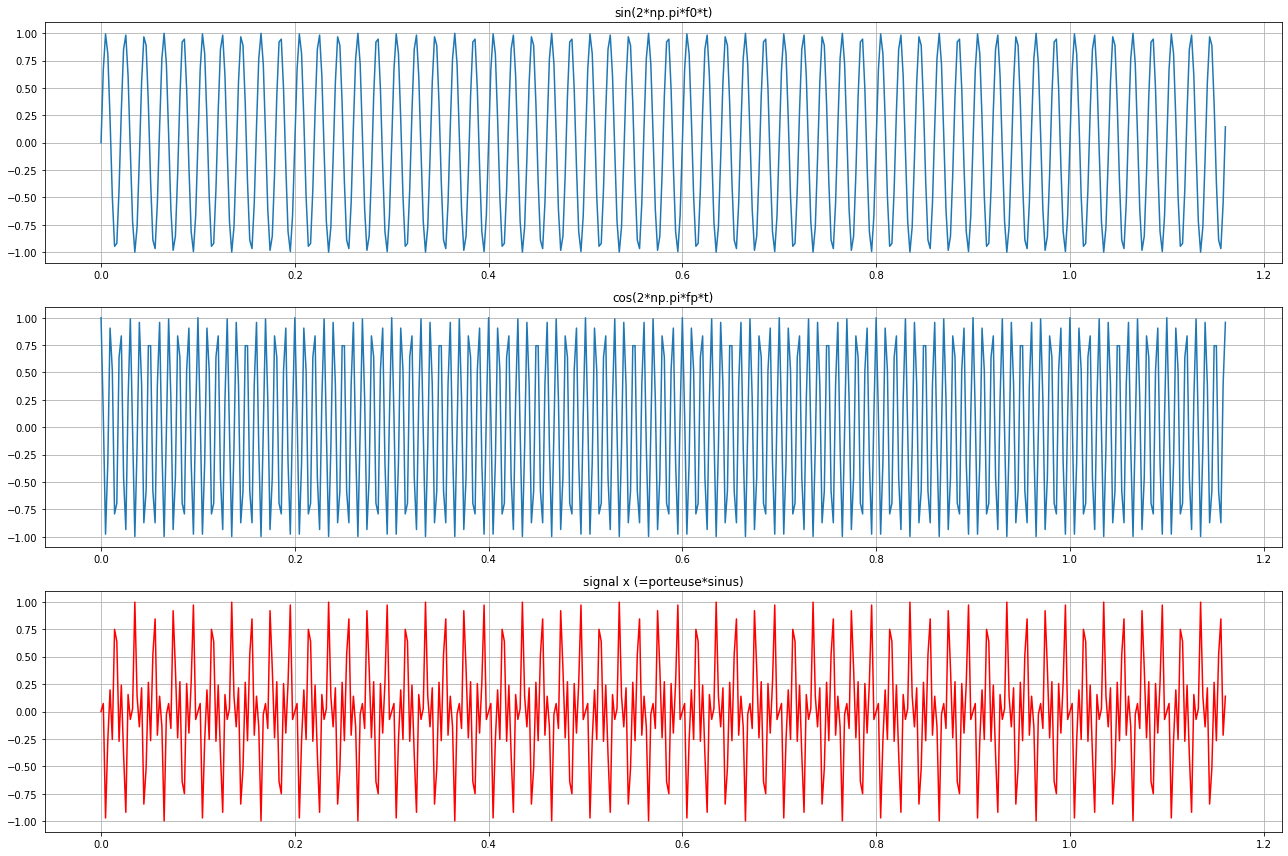

In [9]:
# Signal de taille N = 500
x = generate_a_signal(500)

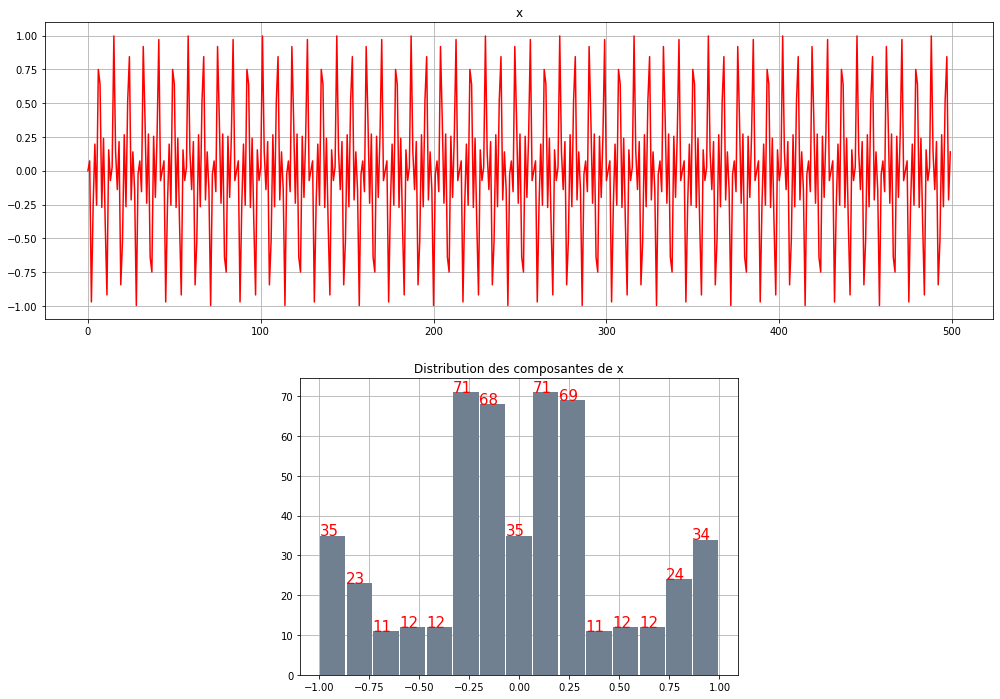

In [10]:
graph_signal(x, titles=["x"])

> ### **Dans la base $C$**
> Pour N = 500

**Génération et visualisation de la matrice $C$**

In [11]:
# Matrice de taille N = 500
C = generate_C_matrix(500)
print(C)

[[ 0.04472136  0.06324524  0.0632443  ...  0.00059607  0.00039738
   0.00019869]
 [ 0.04472136  0.06324274  0.06323432 ... -0.00178799 -0.00119208
  -0.00059607]
 [ 0.04472136  0.06323775  0.06321435 ...  0.00297927  0.00198659
   0.00099342]
 ...
 [ 0.04472136 -0.06323775  0.06321435 ... -0.00297927  0.00198659
  -0.00099342]
 [ 0.04472136 -0.06324274  0.06323432 ...  0.00178799 -0.00119208
   0.00059607]
 [ 0.04472136 -0.06324524  0.0632443  ... -0.00059607  0.00039738
  -0.00019869]]


Visualisation de la matrice C :



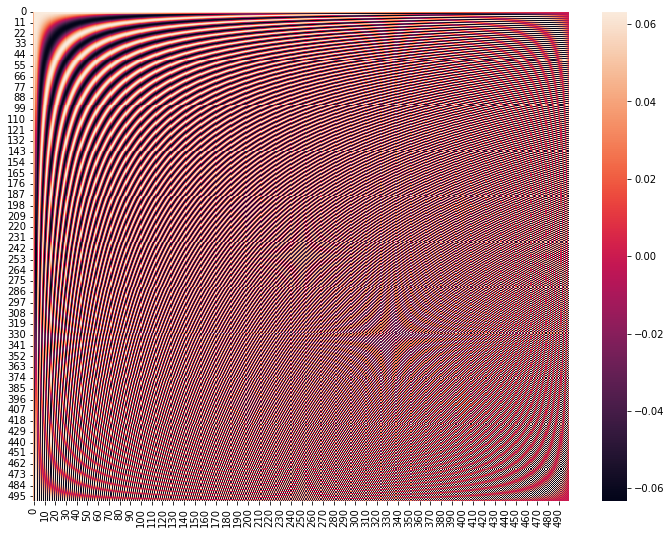

In [12]:
print('Visualisation de la matrice C :\n') 
plt.figure(figsize=(12,9))
sns.heatmap(C)
plt.show()

**Test d'orthonormalité**

Visualisation de la matrice C.T @ C:



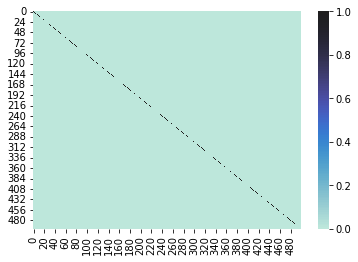

In [13]:
print('Visualisation de la matrice C.T @ C:\n')
sns.heatmap(C.T @ C,center=1)
plt.show()

On remarque que les $N$ vecteurs de la matrice $C$ forment une base orthonormée.

**Représentation parcimonieuse $\alpha$ dans la base $C$**

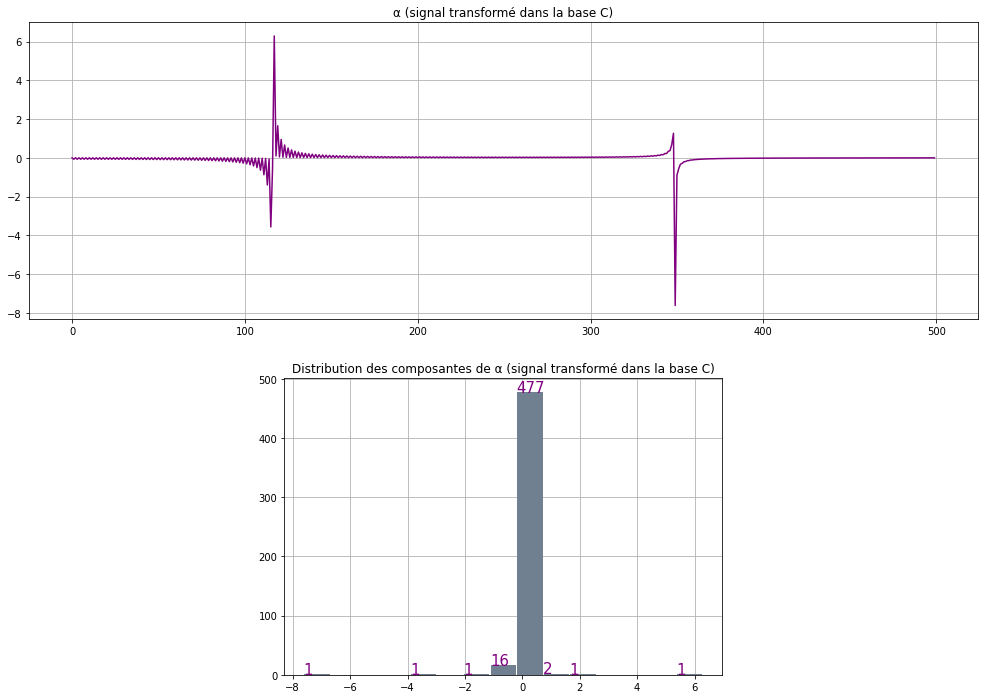

In [14]:
# Transformation du signal vers la nouvelle base
alpha_C = C.T @ x # Calcul de la représentation parcimonieuse alpha_C
graph_signal(alpha_C,c="purple", titles=["α (signal transformé dans la base C)"], print_histogramme=True)

In [15]:
print("* La représentation parcimonieuse alpha dans la base C :\n", alpha_C)

* La représentation parcimonieuse alpha dans la base C :
 [ 3.34968693e-03 -7.11654360e-02  4.73660382e-03 -7.12112437e-02
  4.73489449e-03 -7.13030235e-02  4.73203645e-03 -7.14411057e-02
  4.72801587e-03 -7.16259897e-02  4.72281324e-03 -7.18583478e-02
  4.71640313e-03 -7.21390323e-02  4.70875402e-03 -7.24690823e-02
  4.69982792e-03 -7.28497344e-02  4.68958011e-03 -7.32824334e-02
  4.67795858e-03 -7.37688472e-02  4.66490362e-03 -7.43108827e-02
  4.65034713e-03 -7.49107049e-02  4.63421197e-03 -7.55707602e-02
  4.61641109e-03 -7.62938013e-02  4.59684656e-03 -7.70829186e-02
  4.57540851e-03 -7.79415745e-02  4.55197377e-03 -7.88736445e-02
  4.52640442e-03 -7.98834643e-02  4.49854600e-03 -8.09758850e-02
  4.46822550e-03 -8.21563372e-02  4.43524899e-03 -8.34309059e-02
  4.39939881e-03 -8.48064185e-02  4.36043033e-03 -8.62905483e-02
  4.31806809e-03 -8.78919364e-02  4.27200123e-03 -8.96203372e-02
  4.22187808e-03 -9.14867903e-02  4.16729970e-03 -9.35038280e-02
  4.10781207e-03 -9.56857233e-02

> ### **Dans la base $F$**
> Pour N = 500

**Génération de la matrice $F$**

In [16]:
# Matrice de taille N = 500
F = generate_F_matrix(500)
print(F)

[[0.04472136+0.j         0.04472136+0.j         0.04472136+0.j
  ... 0.04472136+0.j         0.04472136+0.j
  0.04472136+0.j        ]
 [0.04472136+0.j         0.04471783-0.00056197j 0.04470724-0.00112385j
  ... 0.04468958+0.00168556j 0.04470724+0.00112385j
  0.04471783+0.00056197j]
 [0.04472136+0.j         0.04470724-0.00112385j 0.04466487-0.00224699j
  ... 0.0445943 +0.00336872j 0.04466487+0.00224699j
  0.04470724+0.00112385j]
 ...
 [0.04472136+0.j         0.04468958+0.00168556j 0.0445943 +0.00336872j
  ... 0.04443565-0.00504709j 0.0445943 -0.00336872j
  0.04468958-0.00168556j]
 [0.04472136+0.j         0.04470724+0.00112385j 0.04466487+0.00224699j
  ... 0.0445943 -0.00336872j 0.04466487-0.00224699j
  0.04470724-0.00112385j]
 [0.04472136+0.j         0.04471783+0.00056197j 0.04470724+0.00112385j
  ... 0.04468958-0.00168556j 0.04470724-0.00112385j
  0.04471783-0.00056197j]]


Visualisation de la matrice F :



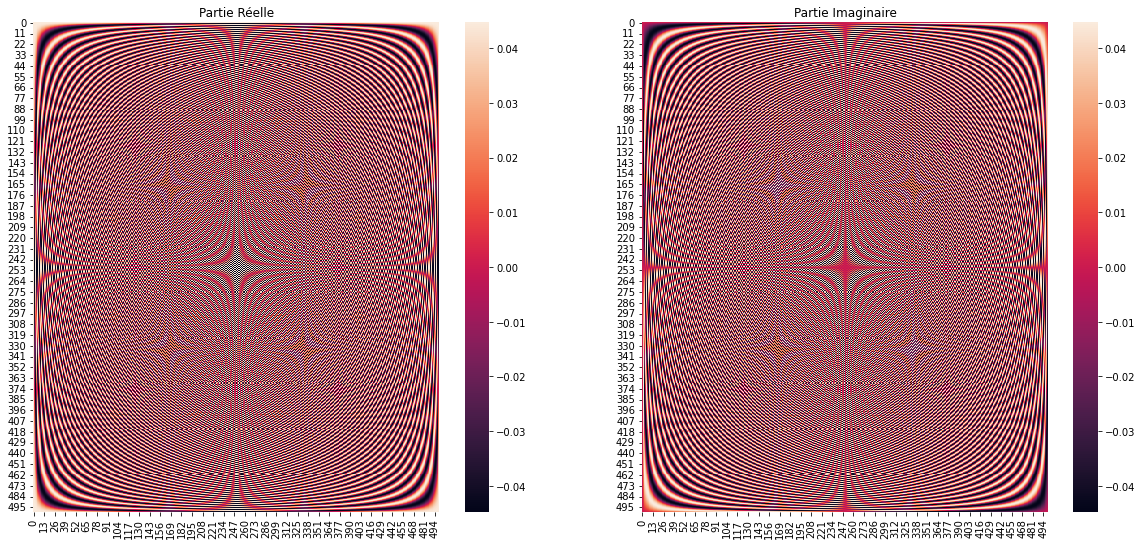

In [17]:
print('Visualisation de la matrice F :\n') 
plt.figure(figsize=(20,9))

plt.subplot(1,2,1)
plt.title("Partie Réelle")
sns.heatmap(np.real(F))

plt.subplot(1,2,2)
plt.title("Partie Imaginaire")
sns.heatmap(np.imag(F))
plt.show()

**Représentation parcimonieuse $\alpha$ dans la base $F$**

In [18]:
# Transformation du signal vers la nouvelle base
alpha_F = F.T @ x # Calcul de la représentation parcimonieuse alpha_C
print(alpha_F)

[ 3.34968693e-03+0.00000000e+00j  3.34696460e-03+3.79770359e-04j
  3.33878623e-03+7.60254185e-04j  3.32511765e-03+1.14216921e-03j
  3.30590152e-03+1.52624174e-03j  3.28105686e-03+1.91321110e-03j
  3.25047826e-03+2.30383419e-03j  3.21403495e-03+2.69889033e-03j
  3.17156952e-03+3.09918635e-03j  3.12289646e-03+3.50556205e-03j
  3.06780031e-03+3.91889613e-03j  3.00603358e-03+4.34011259e-03j
  2.93731418e-03+4.77018784e-03j  2.86132255e-03+5.21015853e-03j
  2.77769819e-03+5.66113023e-03j  2.68603575e-03+6.12428728e-03j
  2.58588043e-03+6.60090371e-03j  2.47672264e-03+7.09235585e-03j
  2.35799181e-03+7.60013644e-03j  2.22904924e-03+8.12587104e-03j
  2.08917969e-03+8.67133669e-03j  1.93758164e-03+9.23848362e-03j
  1.77335581e-03+9.82946041e-03j  1.59549178e-03+1.04466434e-02j
  1.40285209e-03+1.10926711e-02j  1.19415353e-03+1.17704849e-02j
  9.67944827e-04+1.24833771e-02j  7.22580029e-04+1.32350482e-02j
  4.56186570e-04+1.40296756e-02j  1.66626689e-04+1.48719966e-02j
 -1.48549386e-04+1.576740

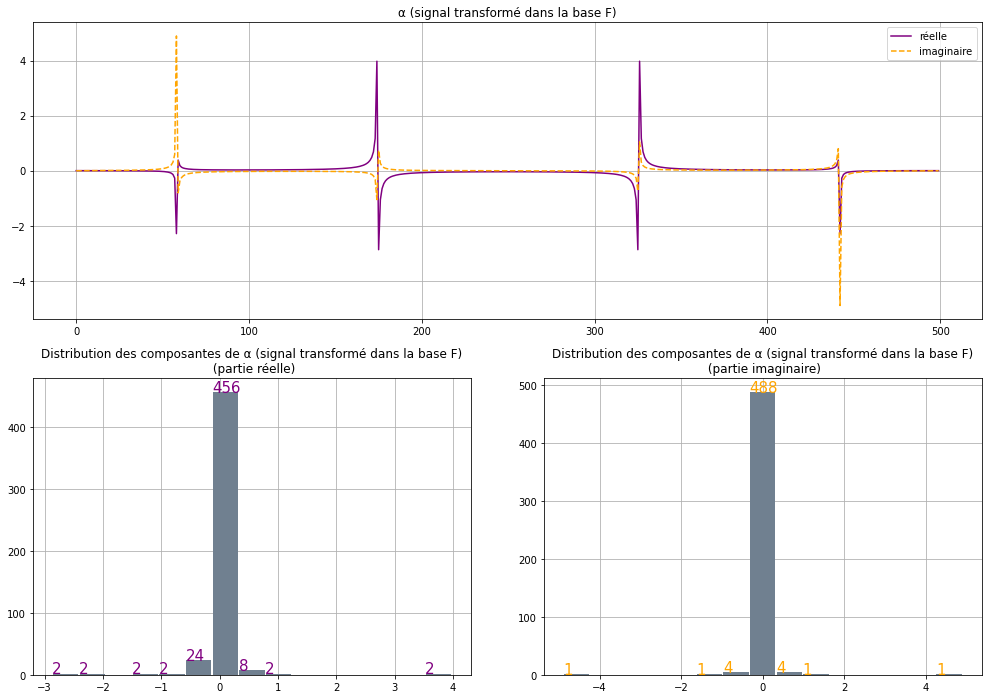

In [19]:
graph_signal(alpha_F,c="purple", titles=["α (signal transformé dans la base F)"],complex_number=True)

In [20]:
print("* La représentation parcimonieuse alpha dans la base F :\n", alpha_F)

* La représentation parcimonieuse alpha dans la base F :
 [ 3.34968693e-03+0.00000000e+00j  3.34696460e-03+3.79770359e-04j
  3.33878623e-03+7.60254185e-04j  3.32511765e-03+1.14216921e-03j
  3.30590152e-03+1.52624174e-03j  3.28105686e-03+1.91321110e-03j
  3.25047826e-03+2.30383419e-03j  3.21403495e-03+2.69889033e-03j
  3.17156952e-03+3.09918635e-03j  3.12289646e-03+3.50556205e-03j
  3.06780031e-03+3.91889613e-03j  3.00603358e-03+4.34011259e-03j
  2.93731418e-03+4.77018784e-03j  2.86132255e-03+5.21015853e-03j
  2.77769819e-03+5.66113023e-03j  2.68603575e-03+6.12428728e-03j
  2.58588043e-03+6.60090371e-03j  2.47672264e-03+7.09235585e-03j
  2.35799181e-03+7.60013644e-03j  2.22904924e-03+8.12587104e-03j
  2.08917969e-03+8.67133669e-03j  1.93758164e-03+9.23848362e-03j
  1.77335581e-03+9.82946041e-03j  1.59549178e-03+1.04466434e-02j
  1.40285209e-03+1.10926711e-02j  1.19415353e-03+1.17704849e-02j
  9.67944827e-04+1.24833771e-02j  7.22580029e-04+1.32350482e-02j
  4.56186570e-04+1.40296756e-02j

## 3. Détermination de la représentation parcimonieuse $\alpha$ à l'aide de l'OMP et comparaison des résultats 

**Application de l'algorithme Orthogonal Matching Pursuit (OMP)**

In [21]:
def OMP(D,x,eps = 0.0001,IterMax = 1000,verbose=True):
    
    # Taille du dictionnaire
    [m,n] = np.shape(D)
   
    # Initialisation résidu, compteur, représentation parcimonieuse
    R = x
    k = 0 

    indices = [] # Liste des indices des atome retenu
   
    # Vecteur des produits scalaires à maximiser
    ps = np.zeros(n)
    ps_history = []

    # Boucle principale
    while norm(R) > eps and k<IterMax:
  
        alpha = np.zeros(n)
        # Boucle recherche produit scalaire max, recherche de la meilleur représentation
        for j in range(n):
            d_j = D[:,j] # [:,j] -> [:->toutes les lignes,j->juste la colonne j]
            ps[j] = np.abs(d_j.T @ R)/norm(d_j) 

        ps_history.append(ps)

        m = np.argmax(ps) #indice de l'atome retenu
        indices.append(m)
        
        A = D[:,indices] #construction de la matrice A, par concaténation des atomes retenues

        # Mise à jour
        # Coef de la rpz de R dans l'atome retenu
        alpha[indices] = pinv(A) @ x

        # Mise à jour de R
        R = x - A @ alpha[indices]
        k += 1 # Mise à jour du compteur

    if verbose:
        print(f'* OMP run(D={D.shape}, x={x.shape}, eps={eps}, IterMax={IterMax})')
        print('* Représentation parcimonieuse',alpha) # alpha[indices]
        print('* Norm du résidu restant:', norm(R))
        print('* Nb iteration',k)
        print("* Indices des atomes retenus", indices)
        print()
    
    return alpha,k,R,indices

> ### Dans la base $C$
> Pour N = 500

In [22]:
# Application de OMP au signal x et la matrice C
alpha_OMP_C = OMP(C, x, eps=1e-3, IterMax=100, verbose=True)[0]

* OMP run(D=(500, 500), x=(500,), eps=0.001, IterMax=100)
* Représentation parcimonieuse [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.         -0.07794157  0.         -0.07887364
  0.         -0.07988346  0.         -0.08097588  0.         -0.08215634
  0.         -0.08343091  0.         -0.08480642  0.         -0.08629055
  0.         -0.08789194  0.         -0.08962034  0.         -0.09148679
  0.         -0.09350383  0.         -0.09568572  0.         -0.09804879
  0.         -0.10061176  0.         -0.1033962   0.         -0.10642712
  0.         -0.10973361  0.         -0.11334974  0.         -0.11731564
  0.         -0.1216789   0.         -0.12649638  0.         -0.13183657
  

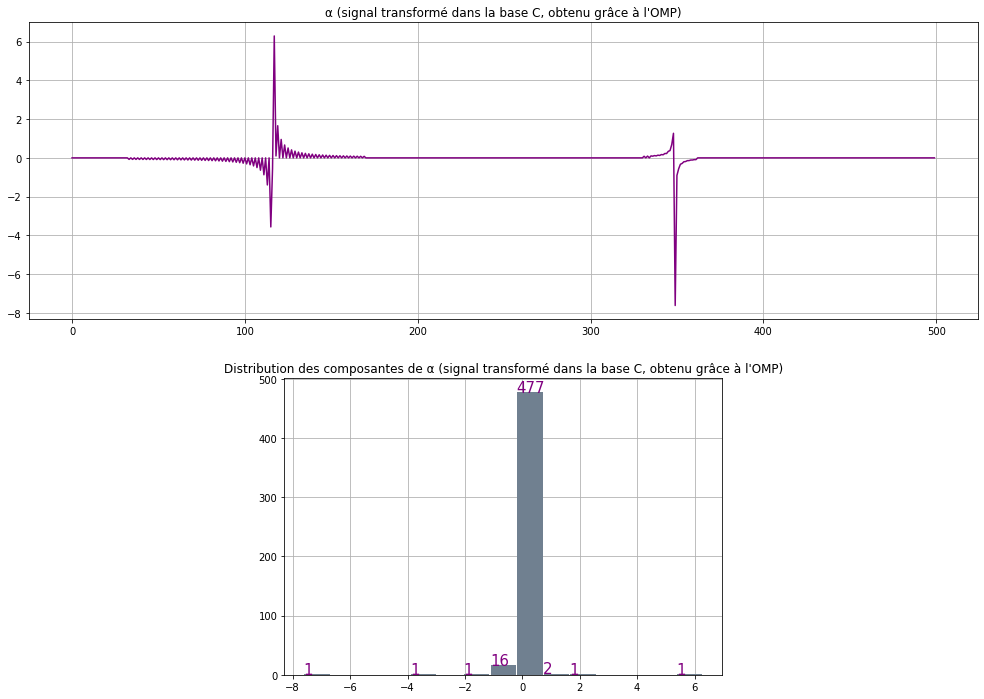

In [23]:
graph_signal(alpha_OMP_C,c="purple", titles=["α (signal transformé dans la base C, obtenu grâce à l'OMP)"])

> ### **Comparaison des deux représentation parcimonieuses $\alpha_C$ et $\alpha_{OMP_C}$**
> Pour N = 500

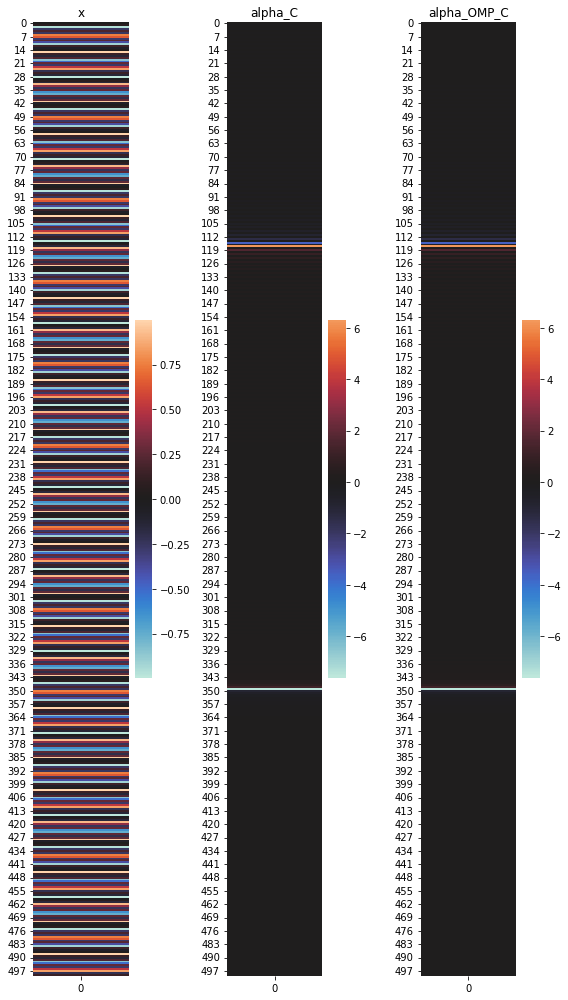

In [24]:
# Une première visualisation pour comparer alpha_C et alpha_OMP_C
plt.figure(figsize=(8,14))

plt.subplot(1,3,1)
plt.title("x")
sns.heatmap(x.reshape(len(x),1), center=0)
plt.subplot(1,3,2)
plt.title("alpha_C")
sns.heatmap(alpha_C.reshape(len(alpha_C),1), center=0)
plt.subplot(1,3,3)
plt.title("alpha_OMP_C")
sns.heatmap(alpha_OMP_C.reshape(len(alpha_OMP_C),1), center=0)

plt.tight_layout()
plt.show()

In [25]:
eps = 10**-5
eval_parcim(alpha_C,epsilon=eps),eval_parcim(alpha_OMP_C,epsilon=eps)

(0.0, 0.8)

- aucun éléments de alpha_C sont inférieur à $10^{-5}$
- 80% des éléments de alpha_OMP_C sont inférieur à $10^{-5}$

alpha_OMP_C est plus parcimonieux que alpha_C

* La norme de la différence entre alpha_OMP at alpha_C : 0.627867493709721




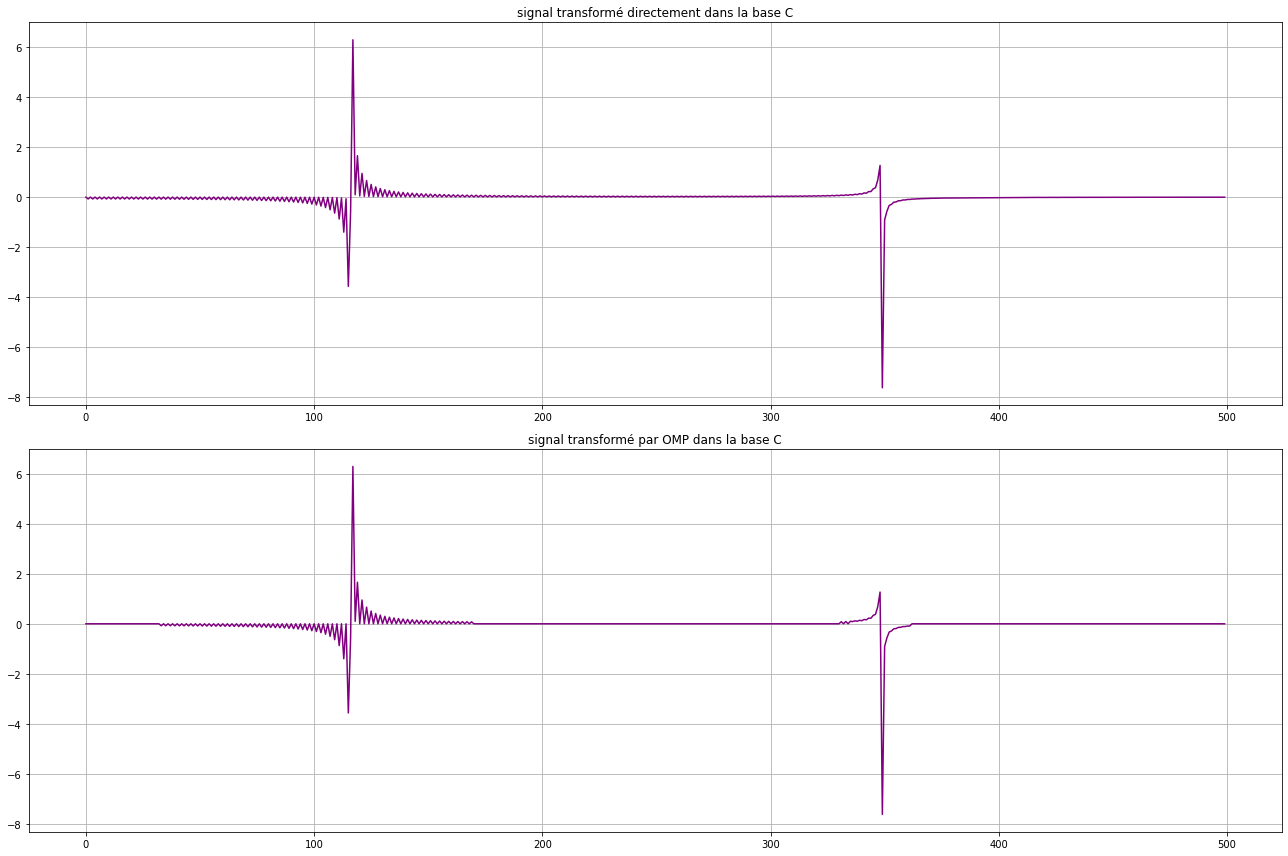

In [26]:
# Une deuxième visualisation pour comparer alpha_C et alpha_OMP_C
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(18,12))

ax1.grid()
ax1.plot(alpha_C,"-",color="purple")
ax1.title.set_text("signal transformé directement dans la base C")

ax2.grid()
ax2.plot(alpha_OMP_C,"-",color="purple")
ax2.title.set_text("signal transformé par OMP dans la base C")

fig.tight_layout()
plt.show()

#Calcul de la norme de la différence entre alpha_OMP_C et alpha_C
norm_diff_C_OMP_C = norm(alpha_OMP_C - alpha_C)

print('* La norme de la différence entre alpha_OMP at alpha_C :', norm_diff_C_OMP_C)
print('\n')

On remarque que la représentation parcimonieuse directe dans la base $C$ et la représentation parcimonieuse qui résulte de l'OMP dans la base $C$ sont presque les mêmes, puisque le plot ci-dessus montre que les représentations sont très similaires, de plus la norme de leurs différences est assez petite. 

D'ailleurs petite remarque : notre alpha très parcimonieuse nous permet bien de retomber sur un vecteur de proche de x

In [27]:
# eux il n'ont pas demander à reconstruire nan ?..
print('* L\'erreur relative de reconstruction du signal x à l\'aide de alpha_C', erreur_relative(C @ alpha_C,x))
print('* L\'erreur relative de reconstruction du signal x à l\'aide de alpha_OMP_C',erreur_relative(C @ alpha_OMP_C,x))

* L'erreur relative de reconstruction du signal x à l'aide de alpha_C (6.286942334923333e-14, True)
* L'erreur relative de reconstruction du signal x à l'aide de alpha_OMP_C (0.05621635827777871, False)


> ### TODO : Dans la base $F$
> Pour N = 500

In [28]:
# Application de OMP au signal x et la matrice F
#warnings.filterwarnings("ignore") # Ignorer les warnings
alpha_OMP_F = OMP(F, x, eps=1e-3, IterMax=100)[0]

* OMP run(D=(500, 500), x=(500,), eps=0.001, IterMax=100)
* Représentation parcimonieuse [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
 

<ipython-input-21-059d382936af>:34: ComplexWarning: Casting complex values to real discards the imaginary part
  alpha[indices] = pinv(A) @ x


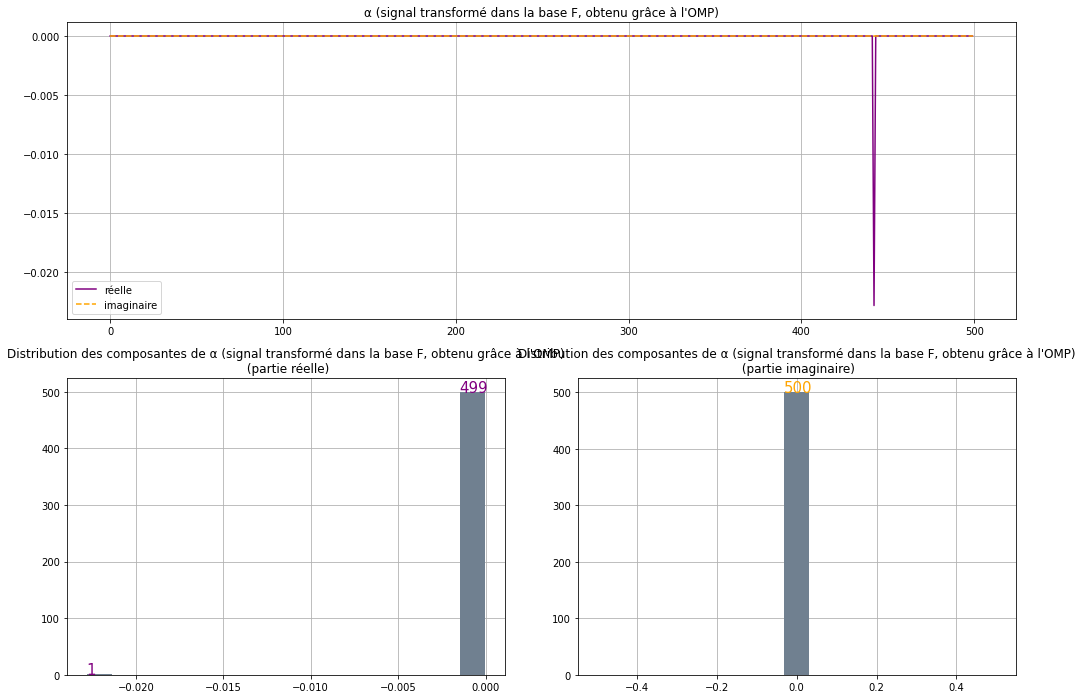

In [29]:
graph_signal(alpha_OMP_F,c="purple", titles=["α (signal transformé dans la base F, obtenu grâce à l'OMP)"],complex_number=True)

## 4. Génération d'un signal de taille N = 100, et détermination de la représentation parcimonieuse directement dans la base $C$ et $F$, puis avec l'OMP dans la base $F$


> **Génération et représentation du signal $s$**

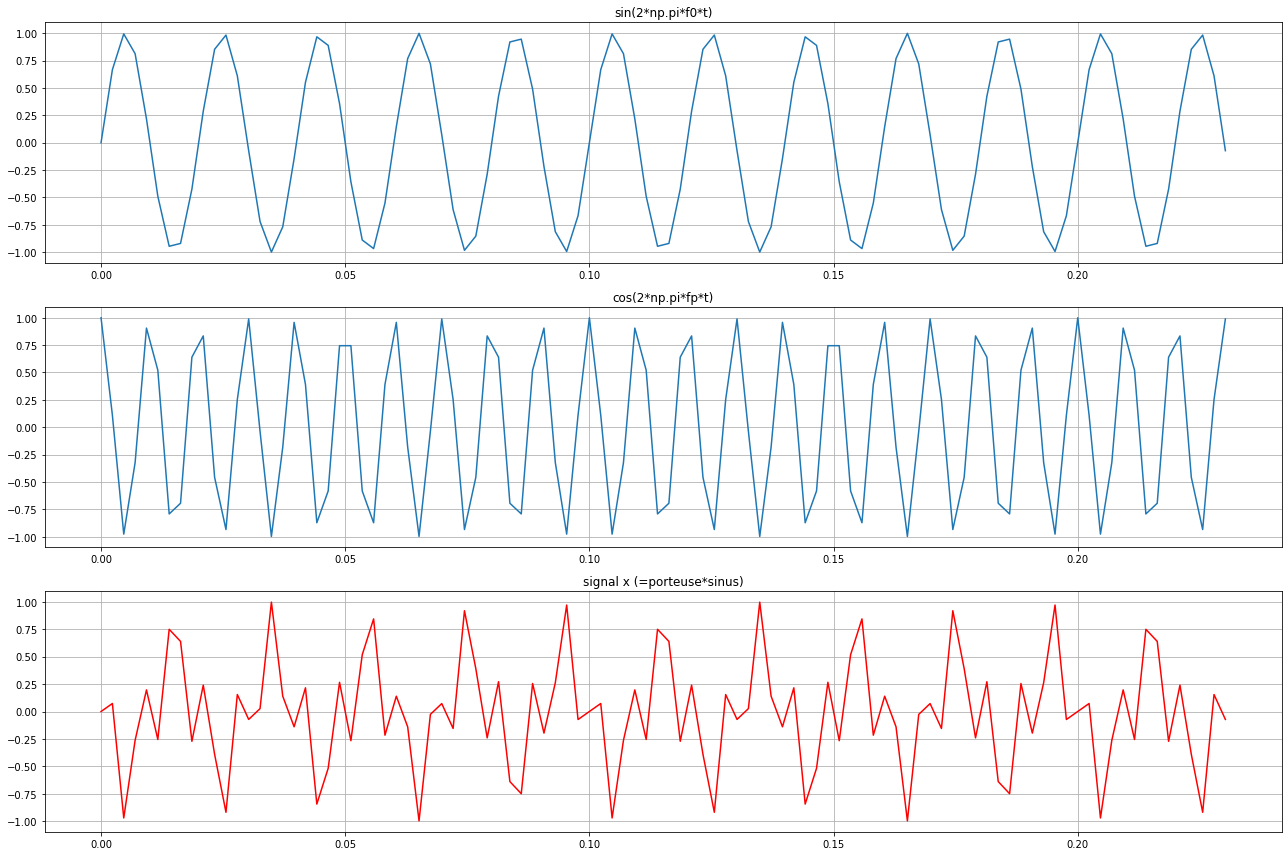

In [30]:
# Signal de taille N = 100
s = generate_a_signal(100)

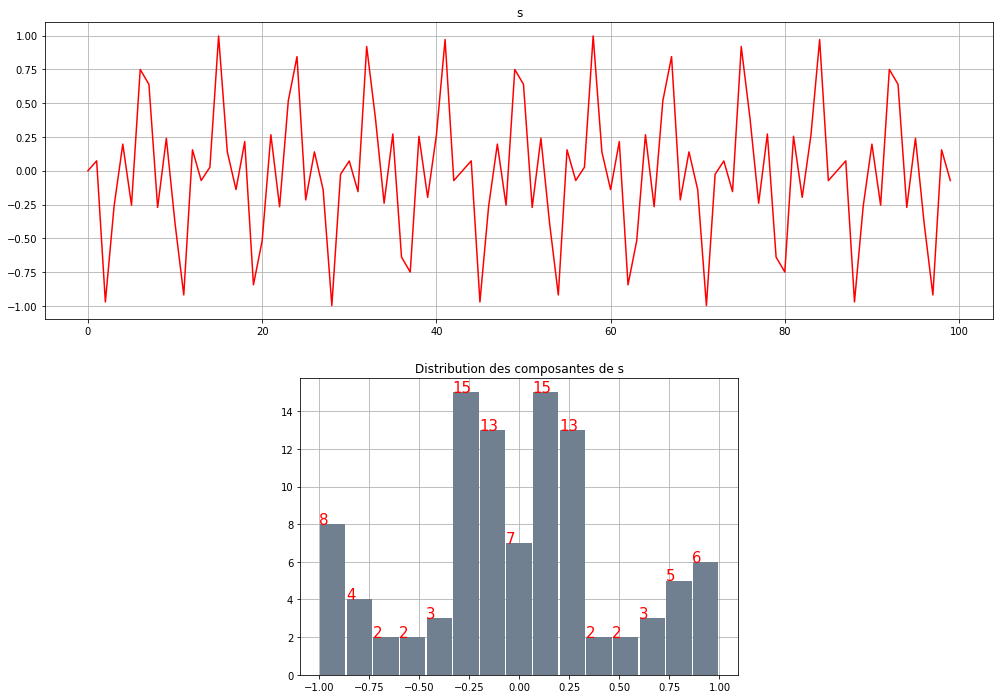

In [31]:
graph_signal(s, titles=["s"])

> ### Dans la base $C$
> Pour N = 100

**Génération de la matrice $C$**

Visualisation de la matrice C :



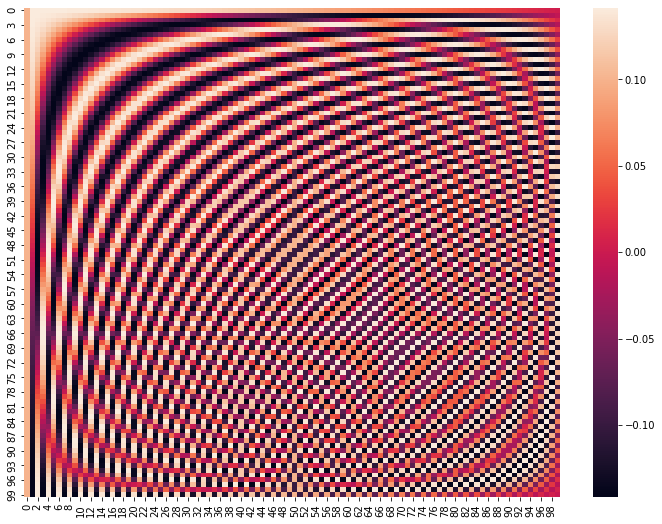

In [32]:
# Matrice de taille N = 100
C = generate_C_matrix(100)
print('Visualisation de la matrice C :\n') 
plt.figure(figsize=(12,9))
sns.heatmap(C)
plt.show()

**Représentation parcimonieuse $\alpha$ dans la base $C$**

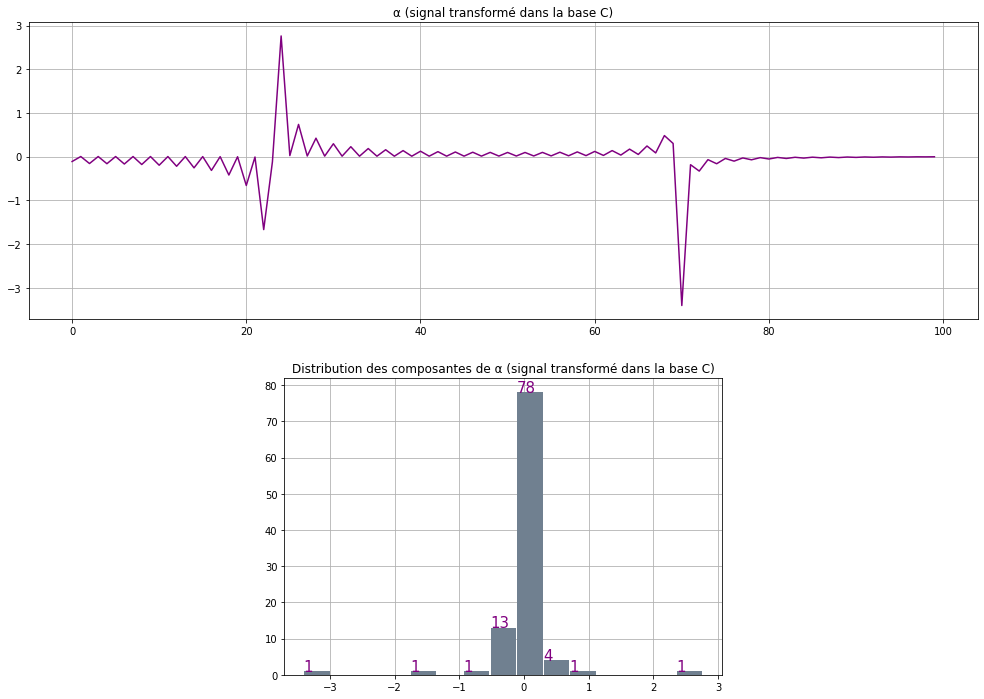

In [33]:
# Transformation du signal vers la nouvelle base
alpha_C = C.T @ s # Calcul de la représentation parcimonieuse alpha_C
graph_signal(alpha_C,c="purple", titles=["α (signal transformé dans la base C)"])

In [34]:
print("* La représentation parcimonieuse alpha dans la base C :\n", alpha_C)

* La représentation parcimonieuse alpha dans la base C :
 [-1.08767261e-01  5.29122338e-03 -1.55126782e-01  5.26178859e-03
 -1.59167851e-01  5.19915374e-03 -1.66335565e-01  5.09484504e-03
 -1.77393289e-01  4.93333280e-03 -1.93698494e-01  4.68696365e-03
 -2.17686416e-01  4.30464817e-03 -2.53998229e-01  3.68384989e-03
 -3.12489423e-01  2.58860771e-03 -4.18120044e-01  3.36149619e-04
 -6.57312059e-01 -6.18398222e-03 -1.66730363e+00 -1.17415112e-01
  2.76536685e+00  2.69095218e-02  7.40432231e-01  1.72996467e-02
  4.24790435e-01  1.45715424e-02  2.97740798e-01  1.34168965e-02
  2.29886834e-01  1.28894586e-02  1.88200737e-01  1.26917069e-02
  1.60407892e-01  1.27038999e-02  1.40914624e-01  1.28724406e-02
  1.26822626e-01  1.31742133e-02  1.16496954e-01  1.36032466e-02
  1.08965149e-01  1.41656599e-02  1.03637315e-01  1.48785296e-02
  1.00167842e-01  1.57713901e-02  9.83884625e-02  1.68904990e-02
  9.82846748e-02  1.83072207e-02  1.00008571e-01  2.01339009e-02
  1.03938450e-01  2.25551151e-02

> **Application de l'algorithme Orthogonal Matching Pursuit (OMP)**

In [35]:
# Application de OMP au signal s et la matrice C
alpha_OMP_C = OMP(C, s, eps=10 ** -3, IterMax=100)[0]

* OMP run(D=(100, 100), x=(100,), eps=0.001, IterMax=100)
* Représentation parcimonieuse [-1.08767261e-01  5.29122338e-03 -1.55126782e-01  5.26178859e-03
 -1.59167851e-01  5.19915374e-03 -1.66335565e-01  5.09484504e-03
 -1.77393289e-01  4.93333280e-03 -1.93698494e-01  4.68696365e-03
 -2.17686416e-01  4.30464817e-03 -2.53998229e-01  3.68384989e-03
 -3.12489423e-01  2.58860771e-03 -4.18120044e-01  0.00000000e+00
 -6.57312059e-01 -6.18398222e-03 -1.66730363e+00 -1.17415112e-01
  2.76536685e+00  2.69095218e-02  7.40432231e-01  1.72996467e-02
  4.24790435e-01  1.45715424e-02  2.97740798e-01  1.34168965e-02
  2.29886834e-01  1.28894586e-02  1.88200737e-01  1.26917069e-02
  1.60407892e-01  1.27038999e-02  1.40914624e-01  1.28724406e-02
  1.26822626e-01  1.31742133e-02  1.16496954e-01  1.36032466e-02
  1.08965149e-01  1.41656599e-02  1.03637315e-01  1.48785296e-02
  1.00167842e-01  1.57713901e-02  9.83884625e-02  1.68904990e-02
  9.82846748e-02  1.83072207e-02  1.00008571e-01  2.01339009e-02
 

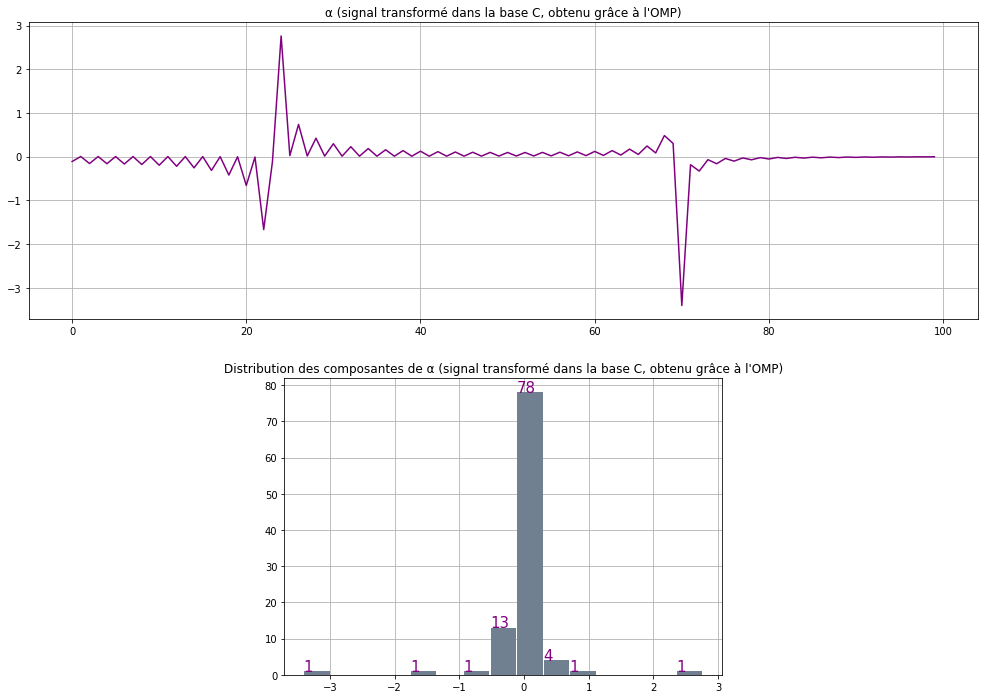

In [36]:
graph_signal(alpha_OMP_C,c="purple", titles=["α (signal transformé dans la base C, obtenu grâce à l'OMP)"])

> ### Comparaison des deux représentation parcimonieuses $\alpha_C$ et $\alpha_{OMP_C}$ 
> Pour N = 100

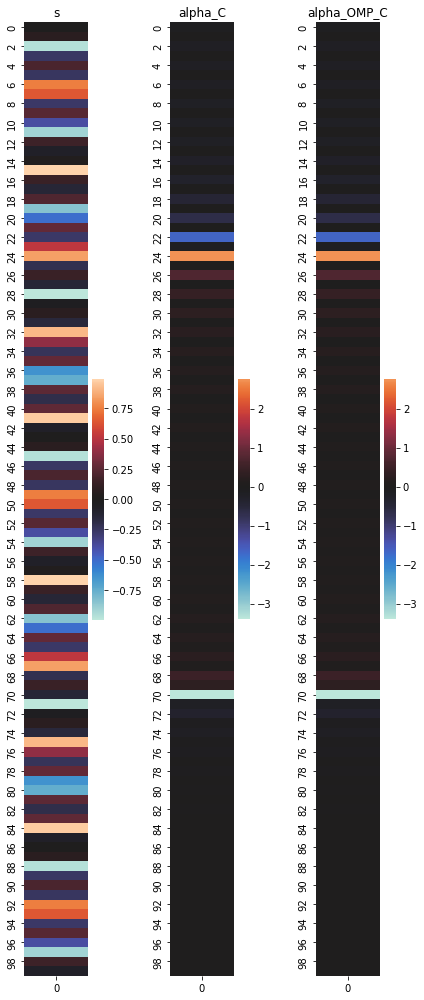

In [37]:
plt.figure(figsize=(6,14))

plt.subplot(1,3,1)
plt.title("s")
sns.heatmap(s.reshape(len(s),1), center=0)
plt.subplot(1,3,2)
plt.title("alpha_C")
sns.heatmap(alpha_C.reshape(len(alpha_C),1), center=0)
plt.subplot(1,3,3)
plt.title("alpha_OMP_C")
sns.heatmap(alpha_OMP_C.reshape(len(alpha_OMP_C),1), center=0)

plt.tight_layout()
plt.show()

* La norme de la différence entre alpha_OMP_C at alpha_C : 0.0005833076291376768




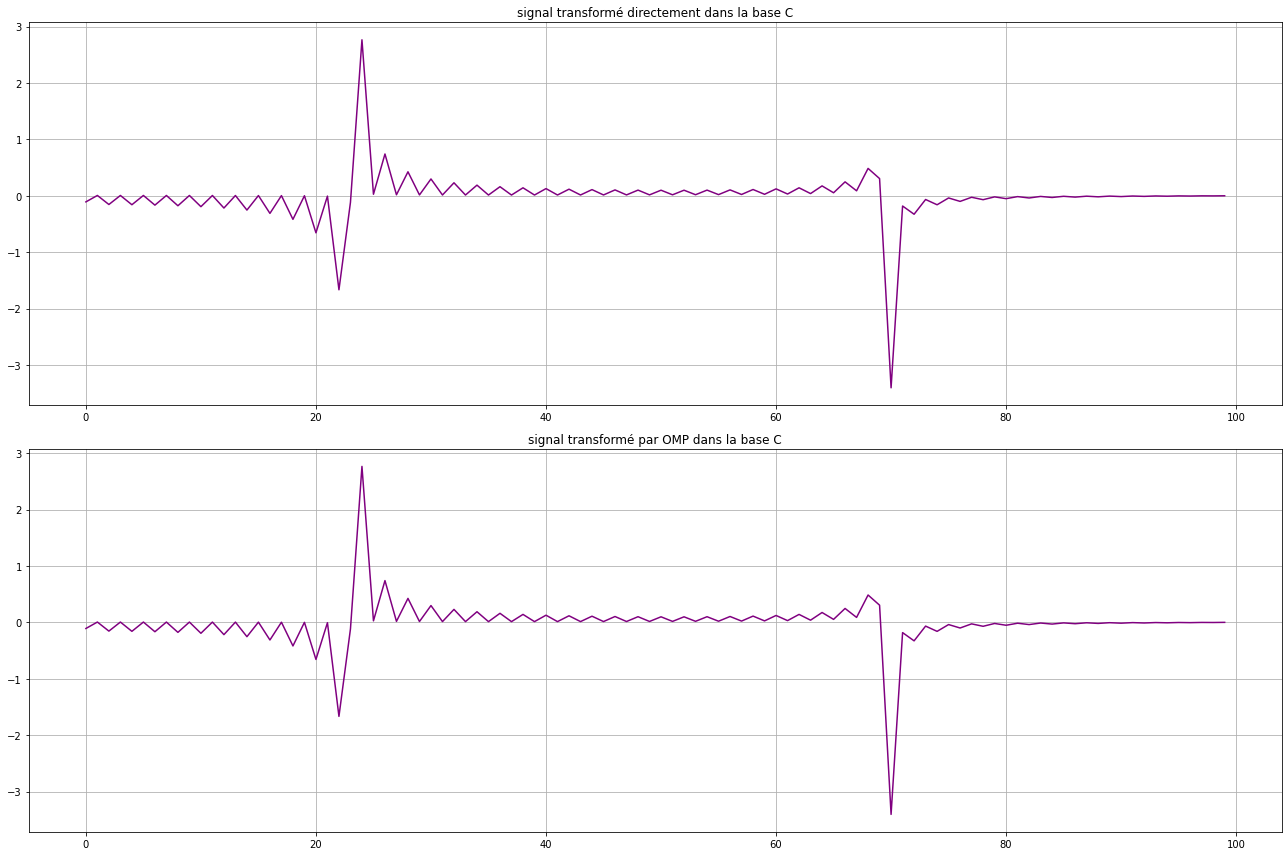

In [38]:
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(18,12))

ax1.grid()
ax1.plot(alpha_C,"-",color="purple")
ax1.title.set_text("signal transformé directement dans la base C")

ax2.grid()
ax2.plot(alpha_OMP_C,"-",color="purple")
ax2.title.set_text("signal transformé par OMP dans la base C")

fig.tight_layout()
plt.show()

# Calcul de la norme de la différence entre alpha_OMP_C et alpha_C
norm_diff_C_OMP_C = norm(alpha_OMP_C - alpha_C)

print('* La norme de la différence entre alpha_OMP_C at alpha_C :', norm_diff_C_OMP_C)
print('\n')

**Remarques**:

Comme avec N=500, on remarque que la représentation parcimonieuse directe dans la base $C$ et la représentation parcimonieuse qui résulte de l'OMP dans la base $C$ sont presque les mêmes, puisque les plots ci-dessus montrent que les représentations sont très similaires, de plus la norme de leurs différences est très petite. 

> ### Dans la base $F$
> Pour N = 100

**Génération de la matrice $F$**

In [39]:
F = generate_F_matrix(100)
print(F)

[[0.1       +0.j         0.1       +0.j         0.1       +0.j
  ... 0.1       +0.j         0.1       +0.j
  0.1       +0.j        ]
 [0.1       +0.j         0.09980267-0.00627905j 0.09921147-0.01253332j
  ... 0.09822873+0.01873813j 0.09921147+0.01253332j
  0.09980267+0.00627905j]
 [0.1       +0.j         0.09921147-0.01253332j 0.09685832-0.02486899j
  ... 0.09297765+0.03681246j 0.09685832+0.02486899j
  0.09921147+0.01253332j]
 ...
 [0.1       +0.j         0.09822873+0.01873813j 0.09297765+0.03681246j
  ... 0.08443279-0.05358268j 0.09297765-0.03681246j
  0.09822873-0.01873813j]
 [0.1       +0.j         0.09921147+0.01253332j 0.09685832+0.02486899j
  ... 0.09297765-0.03681246j 0.09685832-0.02486899j
  0.09921147-0.01253332j]
 [0.1       +0.j         0.09980267+0.00627905j 0.09921147+0.01253332j
  ... 0.09822873-0.01873813j 0.09921147-0.01253332j
  0.09980267-0.00627905j]]


**Représentation parcimonieuse $\alpha$ dans la base $F$**

In [40]:
# Transformation du signal vers la nouvelle base
alpha_F = F.T @ s # Calcul de la représentation parcimonieuse alpha_F
print(alpha_F)

[-1.08767261e-01+0.00000000e+00j -1.09625958e-01-3.79917814e-03j
 -1.12281009e-01-7.79128432e-03j -1.16988068e-01-1.22001429e-02j
 -1.24244648e-01-1.73222676e-02j -1.34935323e-01-2.35975696e-02j
 -1.50646715e-01-3.17491298e-02j -1.74402194e-01-4.30994120e-02j
 -2.12621019e-01-6.04055594e-02j -2.81559061e-01-9.05983378e-02j
 -4.37497579e-01-1.57612339e-01j -1.09541934e+00-4.37809616e-01j
  1.79098798e+00+7.88296084e-01j  4.72059190e-01+2.27447127e-01j
  2.66217329e-01+1.39723930e-01j  1.83151010e-01+1.04288068e-01j
  1.38589460e-01+8.53292282e-02j  1.11017607e-01+7.37081423e-02j
  9.24335802e-02+6.60311413e-02j  7.91841102e-02+6.07561942e-02j
  6.93683385e-02+5.70905343e-02j  6.19042542e-02+5.45952753e-02j
  5.61358966e-02+5.30205086e-02j  5.16488165e-02+5.22299706e-02j
  4.81765436e-02+5.21661274e-02j  4.55513904e-02+5.28370721e-02j
  4.36797194e-02+5.43191202e-02j  4.25337815e-02+5.67764511e-02j
  4.21596308e-02+6.05077502e-02j  4.27093050e-02+6.60473187e-02j
  4.45246058e-02+7.439555

Visualisation de la matrice F :



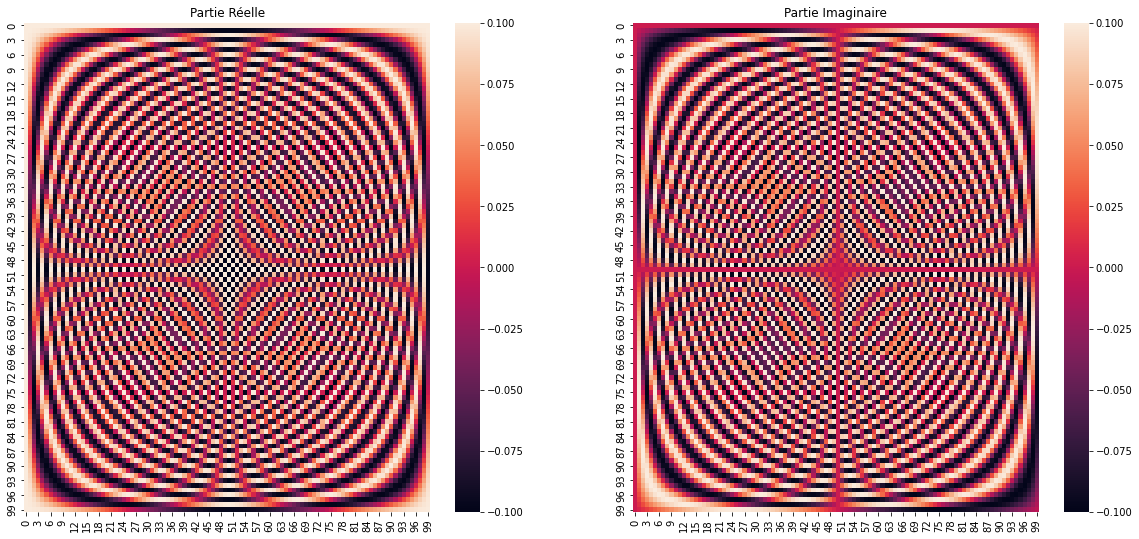

In [41]:
print('Visualisation de la matrice F :\n') 
plt.figure(figsize=(20,9))

plt.subplot(1,2,1)
plt.title("Partie Réelle")
sns.heatmap(np.real(F))

plt.subplot(1,2,2)
plt.title("Partie Imaginaire")
sns.heatmap(np.imag(F))
plt.show()

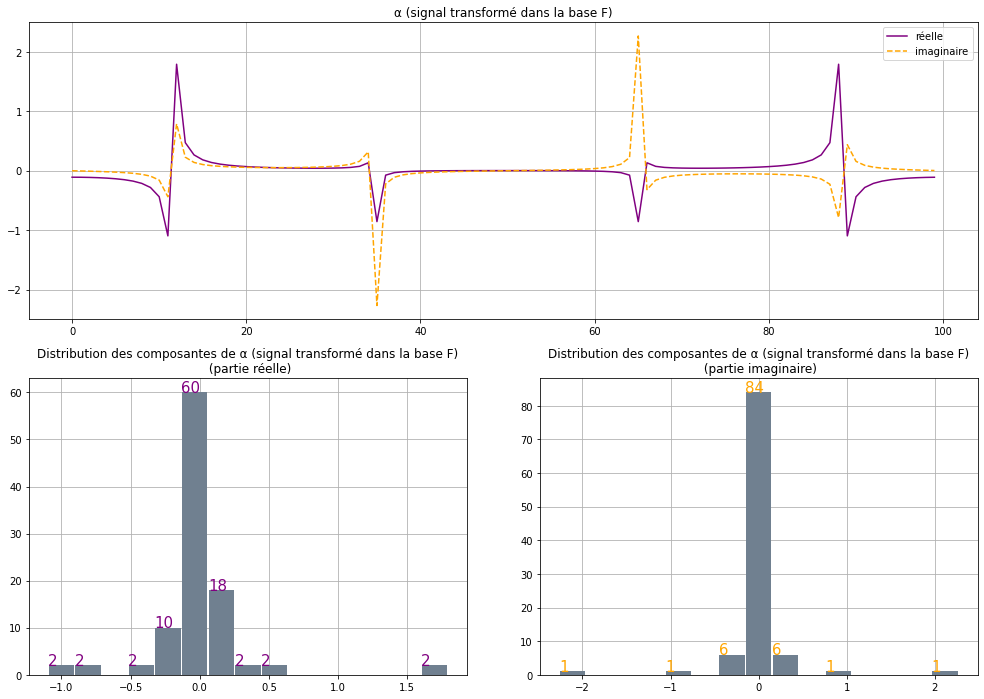

In [42]:
graph_signal(alpha_F,c="purple", titles=["α (signal transformé dans la base F)"],complex_number=True)

> **Application de l'algorithme Orthogonal Matching Pursuit (OMP)**

In [43]:
alpha_OMP_F = OMP(F, s, eps=10 ** -3, IterMax=100)[0]

* OMP run(D=(100, 100), x=(100,), eps=0.001, IterMax=100)
* Représentation parcimonieuse [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.         -0.00855748
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.      

<ipython-input-21-059d382936af>:34: ComplexWarning: Casting complex values to real discards the imaginary part
  alpha[indices] = pinv(A) @ x


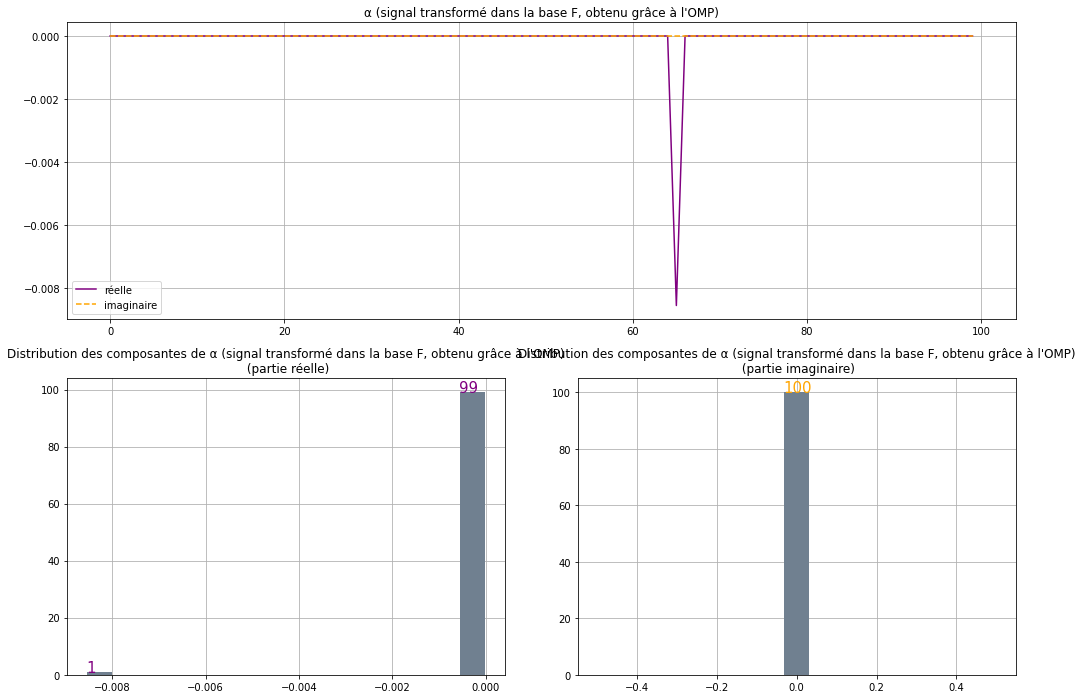

In [44]:
graph_signal(alpha_OMP_F,c="purple", titles=["α (signal transformé dans la base F, obtenu grâce à l'OMP)"],complex_number=True)

> ### Comparaison des deux représentation parcimonieuses $\alpha_F$ et $\alpha_{OMP_F}$ 
> Pour N = 100

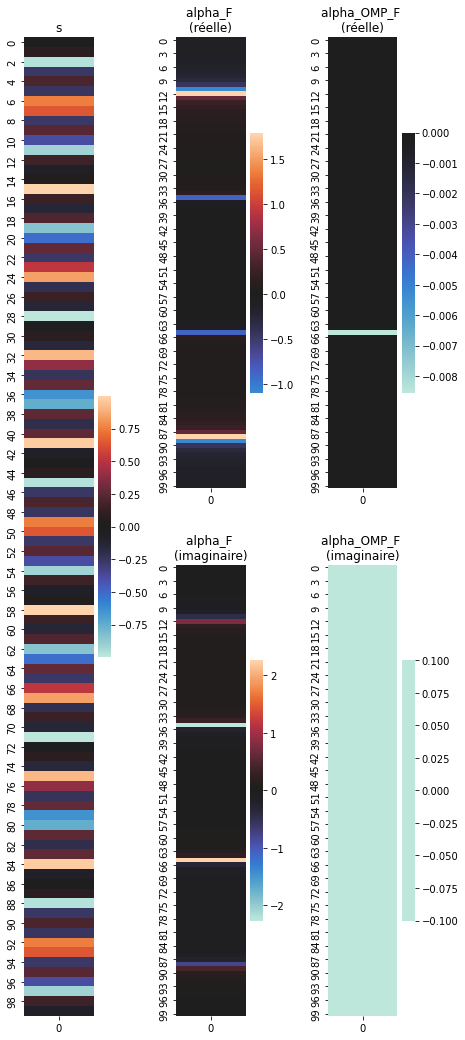

In [45]:
# Une première visualisation pour comparer alpha_F et alpha_OMP_F
plt.figure(figsize=(7,18))
grid = plt.GridSpec(2, 3, wspace=0.75, hspace=0.17)

plt.subplot(grid[:,0])
plt.title("s")
sns.heatmap(s.reshape(len(s),1), center=0)

plt.subplot(grid[0,1])
plt.title("alpha_F \n(réelle)")
sns.heatmap(alpha_F.real.reshape(len(alpha_F),1), center=0)

plt.subplot(grid[1,1])
plt.title("alpha_F \n(imaginaire)")
sns.heatmap(alpha_F.imag.reshape(len(alpha_F),1), center=0)

plt.subplot(grid[0,2])
plt.title("alpha_OMP_F \n(réelle)")
sns.heatmap(alpha_OMP_F.real.reshape(len(alpha_OMP_C),1), center=0)

plt.subplot(grid[1,2])
plt.title("alpha_OMP_F \n(imaginaire)")
sns.heatmap(alpha_OMP_F.imag.reshape(len(alpha_OMP_C),1), center=0)

plt.show()

* La norme de la différence entre alpha_OMP_F at alpha_F : 4.972977777542213




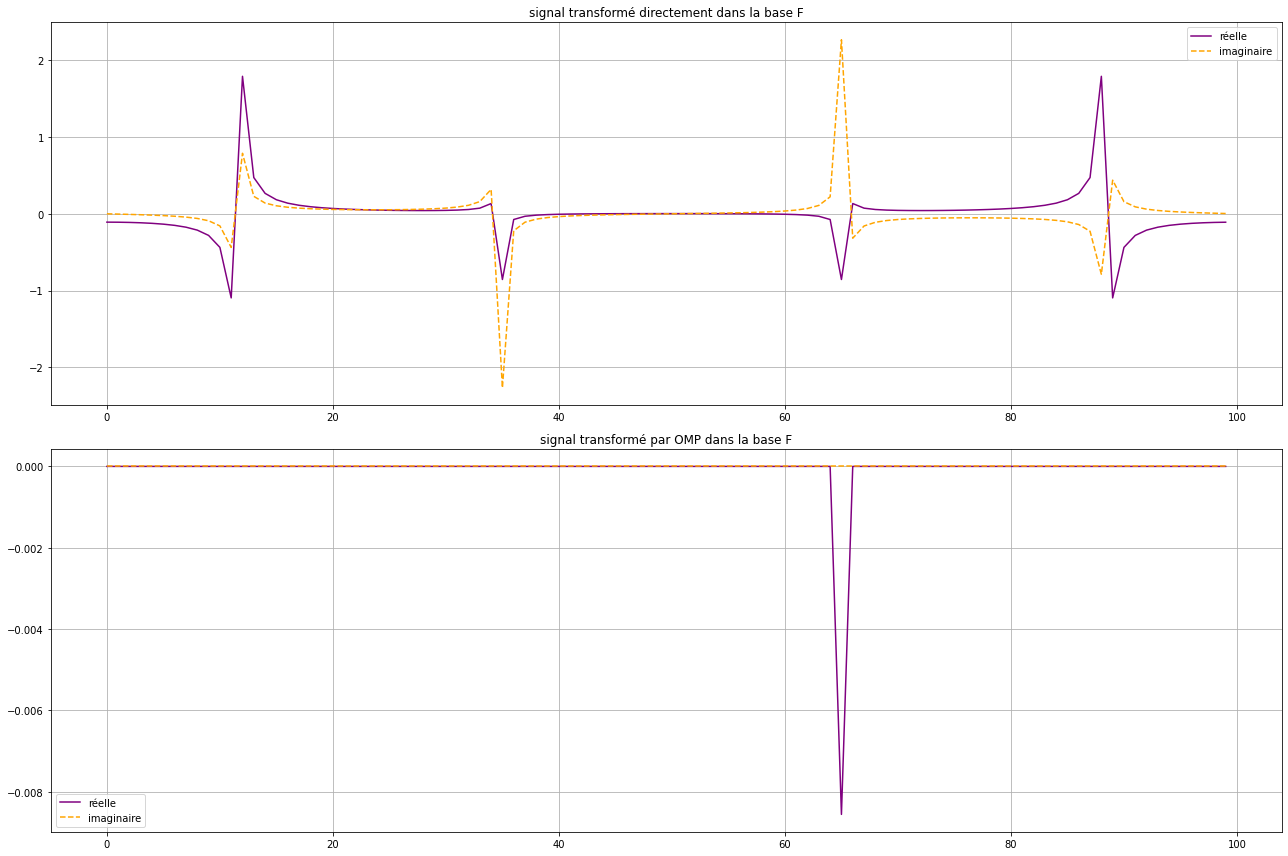

In [46]:
# Une deuxième visualisation pour comparer alpha_C et alpha_OMP_C
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(18,12))

ax1.grid()
ax1.plot(alpha_F.real,"-",color="purple",label="réelle")
ax1.plot(alpha_F.imag,"--",color="orange",label="imaginaire")
ax1.title.set_text("signal transformé directement dans la base F")
ax1.legend()

ax2.grid()
ax2.plot(alpha_OMP_F.real,"-",color="purple",label="réelle")
ax2.plot(alpha_OMP_F.imag,"--",color="orange",label="imaginaire")
ax2.title.set_text("signal transformé par OMP dans la base F")
ax2.legend()

fig.tight_layout()
plt.show()

# Calcul de la norme de la différence entre alpha_OMP_C et alpha_C
norm_diff_C_OMP_C = norm(alpha_OMP_F - alpha_F)

print('* La norme de la différence entre alpha_OMP_F at alpha_F :', norm_diff_C_OMP_C)
print('\n')

## 5. Les algorithmes de type OMP et les dictionnaires qui forment une base

faire le commentaire Réponse dans le rapport

# $\textbf{2/ Algorithme de représentation parcimonieuse IRLS}$

## 1. Equivalence entre $(\mathcal{P}_p)$ et $(\mathcal{P}_2)$

Réponse dans le rapport

## 2. Solution de $(\mathcal{P}_2)$ 

Réponse dans le rapport

## 3. Implémentation de l'algorithme IRLS 

> **Algorithme IRLS**

        4.24790435e-01,  1.45715424e-02,  2.97740798e-01,  1.34168965e-02,
        2.29886834e-01,  1.28894586e-02,  1.88200737e-01,  1.26917069e-02,
        1.60407892e-01,  1.27038999e-02,  1.40914624e-01,  1.28724406e-02,
        1.26822626e-01,  1.31742133e-02,  1.16496954e-01,  1.36032466e-02,
        1.08965149e-01,  1.41656599e-02,  1.03637315e-01,  1.48785296e-02,
        1.00167842e-01,  1.57713901e-02,  9.83884625e-02,  1.68904990e-02,
        9.82846748e-02,  1.83072207e-02,  1.00008571e-01,  2.01339009e-02,
        1.03938450e-01,  2.25551151e-02,  1.10824074e-01,  2.58940719e-02,
        1.22128899e-01,  3.07701515e-02,  1.40915862e-01,  3.85359973e-02,
        1.74589279e-01,  5.28149862e-02,  2.46383609e-01,  8.77055844e-02,
        4.84874489e-01,  3.04272442e-01, -3.40538293e+00, -1.81819367e-01,
       -3.27904273e-01, -6.63339249e-02, -1.59812849e-01, -3.90662050e-02,
       -1.00150146e-01, -2.68216195e-02, -6.98022471e-02, -1.98276656e-02,
       -5.15129292e-02, -

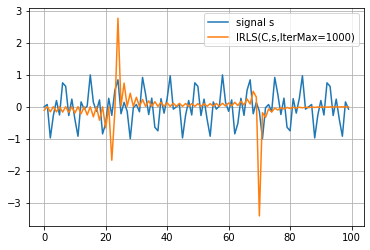

In [47]:
def IRLS(D,x,p=0.975,eps = 10**-1,IterMax=1000,verbose = True):
    # Initialisation des paramètres
    N = D.shape[1]
    
    W = np.zeros((N,N))
    alpha = [D.T @ inv(D@D.T) @ x ] # a) α = [α_0]

    # Boucle IRLS
    k = 0
    #plt.figure(figsize=(15,8))
    while k<IterMax:
        #plt.plot(alpha[-1],label=str(k))
        # b)
        for i in range(N):
            W[i,i]=(abs(alpha[k][i])**2 + eps)**((p/2)-1) # Calcul de W pour chaque nouveau alpha
     
        Q = inv(W.T @ W)
        alpha.append( Q @ D.T @ inv(D@Q@D.T) @ x ) # alpha_0 sera alpha à l'itération k
        # c)
        
        k+=1
        #print("1",k,k-1,norm(alpha[k],2),norm(alpha[k-1],2))
        if abs( norm(alpha[k]) - norm(alpha[k-1]) ) < np.sqrt(eps)/100:
            if eps> 10**-8:
                eps /= 10
  
    #plt.show()
           
    if verbose:
        print(f'* IRLS run(D={D.shape}, x={x.shape}, p={p}, eps={eps}, IterMax={IterMax})')
        print('* Signal initial :',x)
        print('* Représentation parcimonieuse :',alpha) # alpha[indices]
        print('* Nb iteration :',k)
        print()
    return alpha[-1],k

a = IRLS(C,s,IterMax=1000)[0]

plt.grid()
plt.plot(s, label='signal s')
plt.plot(a, label='IRLS(C,s,IterMax=1000)')
plt.legend()
plt.show()

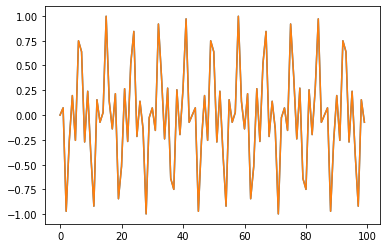

In [48]:
hat_s = C @ a
plt.plot(s, label='signal s')
plt.plot(hat_s, label='IRLS(C,s,IterMax=1000)')
erreur_relative(hat_s,s)

In [49]:
print('La norme de la différence entre le signal s et le signal s reconstruit : ',norm(s - (C @ a)) )

La norme de la différence entre le signal s et le signal s reconstruit :  1.0009251505405858e-09


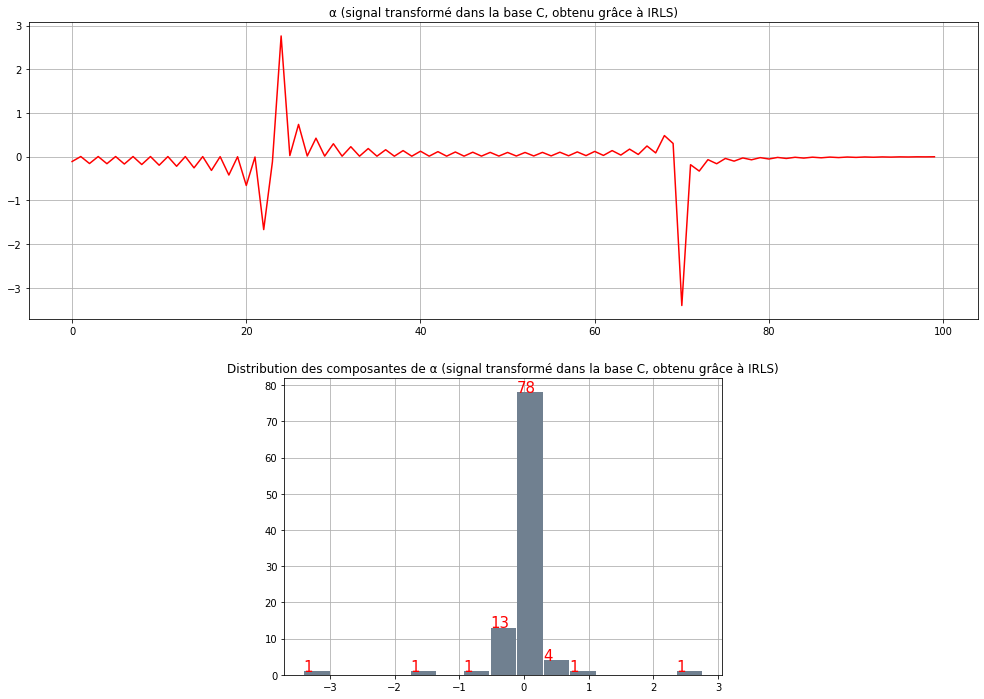

In [50]:
graph_signal(a, titles=["α (signal transformé dans la base C, obtenu grâce à IRLS)"])

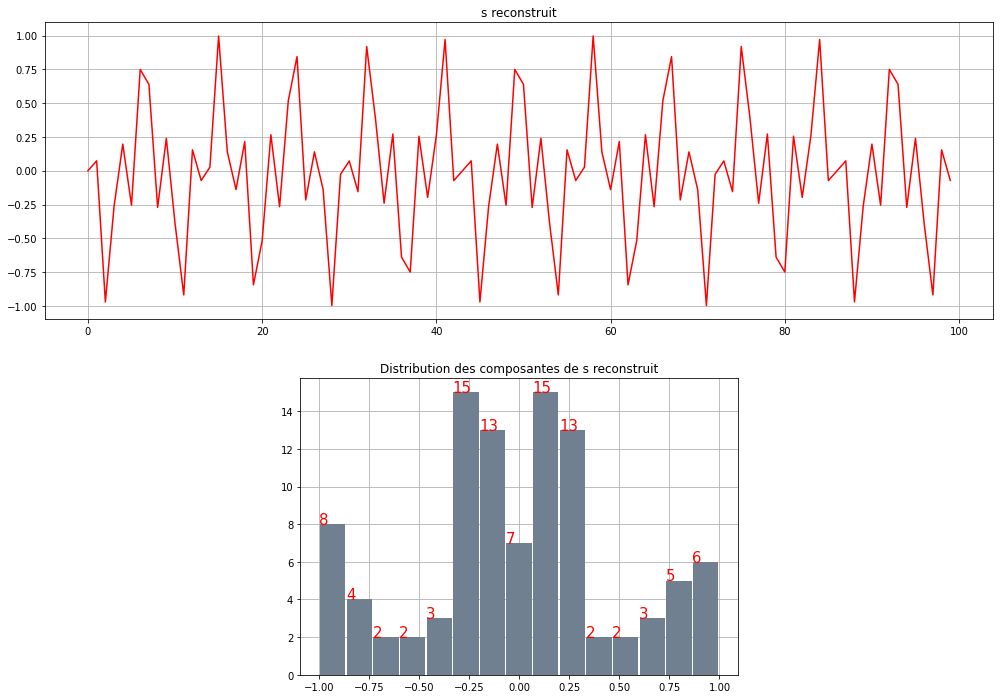

In [51]:
graph_signal(hat_s, titles=["s reconstruit"])

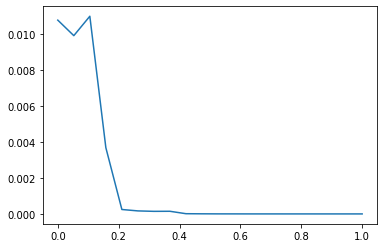

In [52]:
result_IRLS_norm = []
result_IRLS_k = []
p_range = np.linspace(0,1,20)
for p in p_range:
    a,k = IRLS(C,s,p=p,IterMax=1000,verbose=False)
    result_IRLS_norm.append(norm(s - (C @ a)))
    result_IRLS_k.append(k)

plt.plot(p_range, result_IRLS_norm)
plt.show()

On remarque que plus le paramètre $p$ de IRLS tend vers 1, plus le signal reconstruit est similaire au signal original

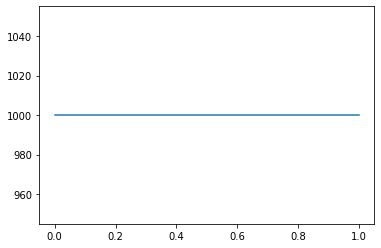

In [53]:
plt.plot(p_range, result_IRLS_k)
plt.show()

le nombre d'itération ne bouge pas, et ne dépend pas de $p$

> **Algorithme MP**

In [54]:
def MP(D,x,eps,IterMax,verbose = True):
    # Taille du dictionnaire
    [m,n] = np.shape(D)
   
    # Initialisation résidu, compteur, représentation parcimonieuse
    R = x
    k = 0
    alpha = np.zeros(n) # n = nb col de D
   
    # Vecteur des produits scalaires à maximiser
    ps = np.zeros(n)

   
    # Boucle principale
    while norm(R) > eps and k<IterMax:
        # Boucle recherche produit scalaire max
        for j in range(n):
            d_j = D[:,j] # [:,j] -> [:->toutes les lignes,j->juste la colonne j]
            ps[j] = np.abs(d_j.T @ R)/norm(d_j) 
        
        m = np.argmax(ps) # m = indice de l'atome retenu.
       
        d_m = D[:,m]
        z = (d_m.T @ R)/(norm(d_m))**2 # z = coordonnées dans cette direction

        # Mise à jour
        alpha[m] += z
        R = R - z*d_m.T
        k += 1

    if verbose:
        print(f'* MP run(D={D.shape}, x={x.shape}, eps={eps}, IterMax={IterMax})')
        print('* Représentation parcimonieuse :',alpha) 
        print('* Résidu restant :',R)
        print('* Nb iteration :',k)
        print()
    return alpha,k,R

**Algorithme OMP (ci-dessus)**

# $\textbf{3/ Apprentissage d’un dictionnaire (k-SVD)}$

## Données

**Importation et affichage des données**

In [55]:
X = pd.read_excel("DonneesCS22.xlsx")
print('La matrice des données est :\n:', X)
X = X.to_numpy() # Convertir le tabelau en une matrice 

La matrice des données est :
:               x1           x2           x3           x4          x5  \
0   17818.075958     0.001000     0.000000  5458.375597  549.439282   
1      32.499613     8.208718     0.467686   106.468035    0.000821   
2      92.237752    27.465853     0.000000   198.299439    7.327154   
3     197.983624    14.390810    65.047185   751.843652    3.664955   
4     203.879796    89.952160   188.165601   583.635985    5.843054   
..           ...          ...          ...          ...         ...   
93    318.737697   460.756860  1739.880984  3978.492312  142.061055   
94    333.779108  1258.937159  1670.793281  3843.130397  562.568525   
95    304.573734   565.522963  1612.095202  4139.569436  136.982567   
96    407.748044   378.112095  1797.264958  4172.718258  142.847183   
97    310.375046   460.378634  1786.160974  4204.740501  410.336320   

             x6           x7           x8          x9         x10  ...  \
0   1842.682187  1236.306323     0.000997 

**Visualisation des données importés**

In [56]:
X

La taille du tableau de données est (98, 108)


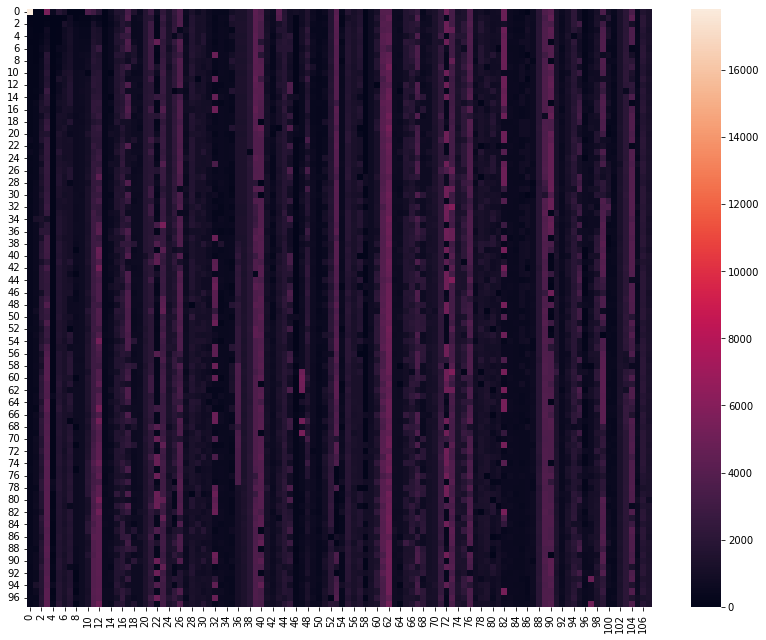

In [57]:
print('La taille du tableau de données est', X.shape)
plt.figure(figsize=(14,11))
sns.heatmap(X)
plt.show()

## 1. Implémentation du k-SVD 

In [58]:
def k_svd(X, k, D0, Nk, eps_OMP, N_OMP, verbose=True):
    # Nk : itermax ksvd
    # N : itermaxOmp
    p,q = X.shape
    
    D = np.copy(D0)
    D_history = [D]
    # normalisation des vecteur de D
    for j in range(k):
        D[:,j] = D[:,j]/norm(D[:,j])
    Alpha = np.zeros((k,X.shape[1]))

    # Initialisation compteur boucle kSVD
    l = 0
    # Boucle principale
    while l < Nk:
        #print("#"*100)
        # Rpz parcim. de tous les signaux dans le dico actuel
        for i in range(X.shape[1]): #pour chaq signaux, return alpha : rpz parcimon.
            Alpha[:,i] = OMP(D,X[:,i], eps_OMP, N_OMP, verbose=False)[0]
        
        # Boucle actualisation des colonnes d
        for j in range(k):
            #print("#"*10)
            
          
            ### les signaux auxquels la direction d_j ne contribue pas
            index = [_ for _ in range(X.shape[1]) if Alpha[j,_] != 0]

            #print("#",len(index))
            #print("     index",index)
            if len(index)>0: # on construit matrice Omega
                #Ei = X - D @ Alpha + np.matrix(D[:,j]).T @ np.matrix(Alpha[j,:])
                #Ei = X-np.dot(D,Alpha)+np.dot(np.transpose(np.matrix(D[:,j])),np.matrix(Alpha[j,:]))
                Ei = X - (D @ Alpha) + np.matrix(D[:,j]).T @ np.matrix(Alpha[j,:])

                Omega = np.zeros((X.shape[1],len(index)))
                for r in range(len(index)):
                    Omega[index[r], r] = 1 # matrice identité qui ont le mm numéro que les composantes non nulles de Alpha_j,•

                Eir = Ei @ Omega

                U,S,V = svd(Eir)  # Décomp. en vals singulière
                
                #print(f"U={U[:,0].reshape(U[:,0].shape[0],1).shape}",D[:,j].shape)
                #print(l,"#",D[:,j].shape,U[:,0].shape)
                D[:,j] = np.matrix(U[:,0]).T #Maj de la col d_j
                Alpha[j,index] = S[0] * V[:,0].T
            else:
                #Mise a jour dans le cas Alphaj = 0
                #print("***")
                np.random.seed(123) # 'figé' le hasard
                D[:,j] = np.matrix(np.random.rand(p,1)).T
                #t = np.random.randint(0,X.shape[1])
                #D[:,j] = X[:,t]
                D[:,j] = D[:,j]/norm(D[:,j])
            D_history.append(D)
            # On passe ensuite à la colonne suivante jusqu'à la \math-container{k}ème.
        l += 1
        print("*",end="")

    if verbose:
        print(f'* k_svd run(X={X.shape}, k={k}, Nk={Nk})')
        print('* Matrice représentation parcimonieuse final',Alpha.shape) 
        print('* Itérations ',l) 
        fig = plt.figure(figsize=(16,13))
        plt.subplot(1,2,1)
        plt.title("* Dictionnaire D initial :")
        print("* Dictionnaire D initial :", D0.shape)

        sns.heatmap(D0, center=0)
        plt.subplot(1,2,2)
        plt.title("* Dictionnaire D retourné :")
        print("* Dictionnaire D retourné :", D.shape)
        sns.heatmap(D, center=0)
        plt.show()
        plt.close(fig)

    return D

## 2. Application pour construction d'un dictionnaire de 100 atomes adapté aux 108 signaux du fichier ”DonneesProjet.xlsx”, en partant des 100 premières colonnes

*********** k_svd run(X=(98, 108), k=100, Nk=10)
* Matrice représentation parcimonieuse final (100, 108)
* Itérations  10
* Dictionnaire D initial : (98, 100)
* Dictionnaire D retourné : (98, 100)


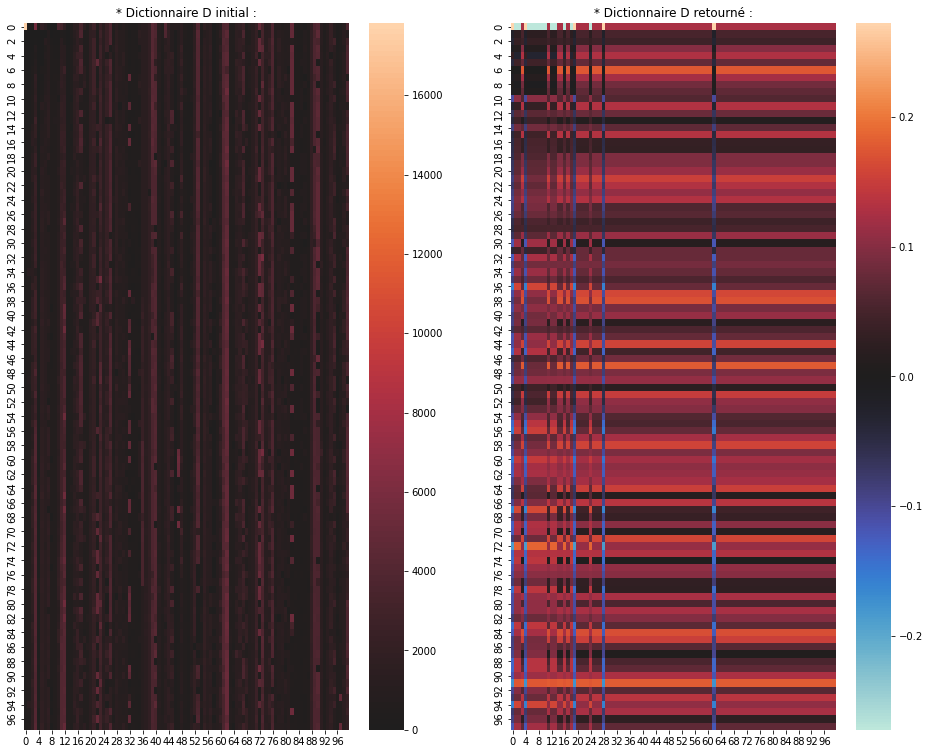

In [59]:
K = 100

# Le dictionnaire initial est en général arbitraire, soit généré aléatoirement.
# Initialisation de D aux k premières colonnes de X

D0 = X[:,:K]

D_ksvd_result = k_svd(X, K, D0=D0, eps_OMP=10 ** -4, Nk=10, N_OMP=30)

## 3. Comparaison de l’efficacité des 3 algorithmes de représentation parcimonieuse (MP, OMP et IRLS) à partir d'une application aux 3 signaux test avec le dictionnaire obtenu par k-SVD

**Les signaux test**


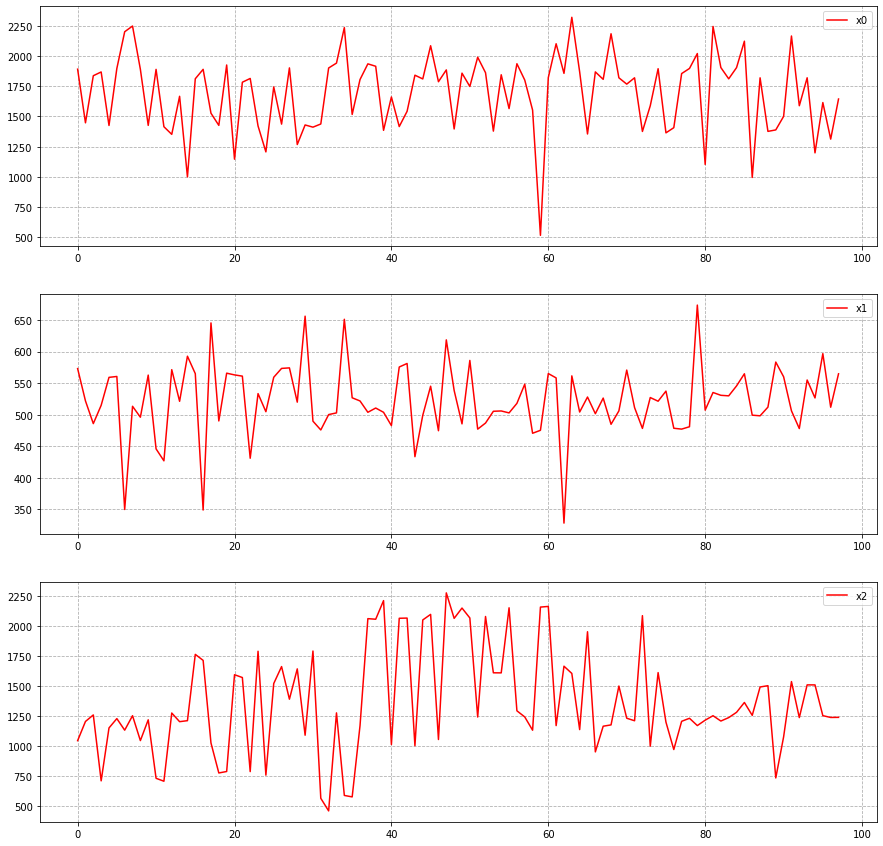

In [60]:
np.random.seed(123)
test_signals = [X[:,j] for j in np.random.choice(X.shape[1],3)] # On prend 3 signaux de X : signal0, signal1 et signal2 

#Afficher les signaux test
fig = plt.figure(figsize=(15,15))
for n,x in enumerate(test_signals):
    plt.subplot(len(test_signals),1,n+1)
    plt.grid(linestyle='--')
    plt.plot(x,"-",c='red',label=f"x{n}")
    plt.legend()

plt.show()
plt.close(fig)    

        2.17551712e-05,  2.17551712e-05,  2.17551712e-05,  5.10306167e+03]), array([ 2.18722281e-10,  1.41481464e-10,  1.81109001e-10,  8.25640278e-06,
       -1.19005136e-10,  1.52357389e-10,  1.40517502e-10,  6.96873589e-11,
        4.96071094e+09,  9.40245253e-11,  1.48260238e-10,  8.25640278e-06,
        1.13856313e-10,  1.67391417e-10,  8.25640278e-06,  8.25640278e-06,
        1.65543721e-10,  8.25640278e-06,  9.00787347e-11, -1.76358973e-10,
        8.25640278e-06,  8.25640278e-06,  8.25640278e-06,  8.25640278e-06,
        1.60808232e-10,  8.25640278e-06,  8.25640278e-06,  8.25640278e-06,
        4.96128548e+09,  8.25640278e-06,  8.25640278e-06,  8.25640278e-06,
        8.25640278e-06,  8.25640278e-06,  8.25640278e-06,  8.25640278e-06,
        8.25640278e-06,  8.25640278e-06,  8.25640278e-06,  8.25640278e-06,
        8.25640278e-06,  8.25640278e-06,  8.25640278e-06,  8.25640278e-06,
        8.25640278e-06,  8.25640278e-06,  8.25640278e-06,  8.25640278e-06,
        8.25640278e-06,

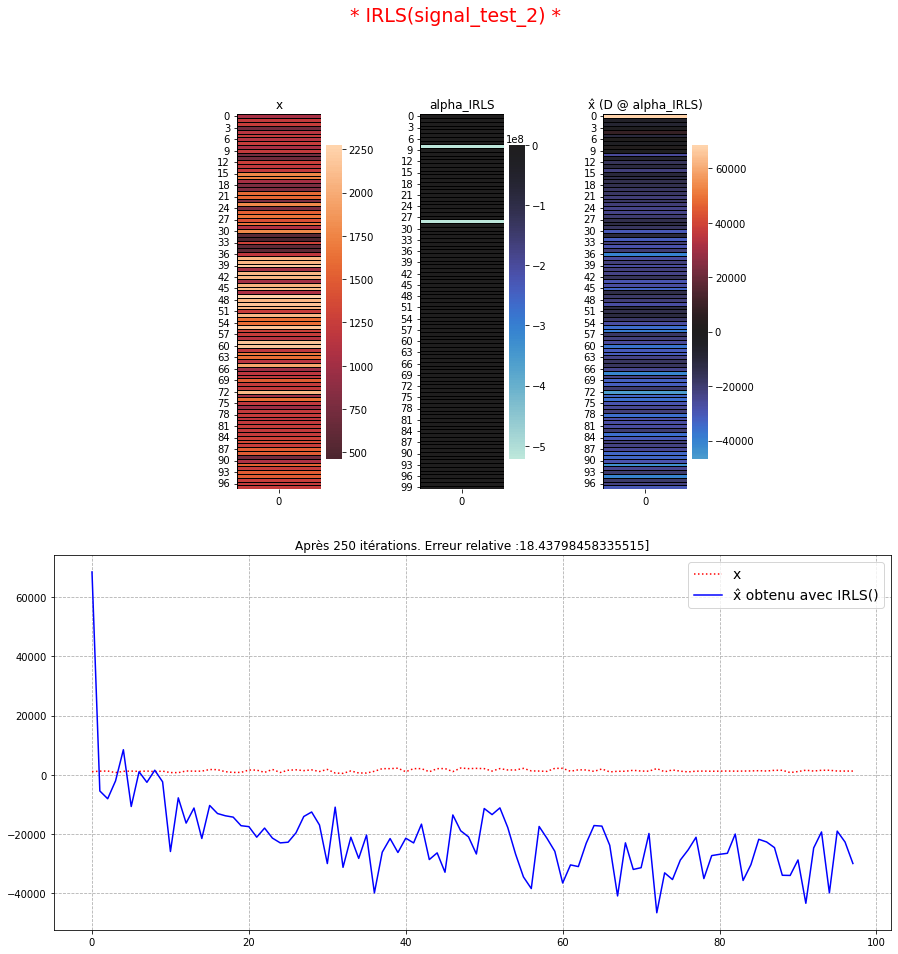

In [61]:

alpha_results = {}
for n,x in enumerate(test_signals):
    print("#"*40,"SIGNAL TEST",n,"#"*40,"\n")

    alpha_results[n] = {}
    for f,f_name,eps in zip([MP,OMP,IRLS],["MP","OMP","IRLS"],[10**-3,10**-3,10**-1]):
        fig = plt.figure(figsize=(15,15))
        figTitle = f"* {f_name}(signal_test_{n}) * "
        fig.suptitle(figTitle, fontsize=19,color="red")
        grid = plt.GridSpec(2, 5, wspace=0.75, hspace=0.175)
        
        print("*"*50,f_name)
        # Heatmap x
        plt.subplot(grid[0, 1])
        plt.title(f"x")
        sns.heatmap(reshape(x),linewidths=1,center=0, linecolor='black')
        alpha_results[n][f_name] = {"x" : x} 

        # Find alpha
        alpha,nb_iter = f(D_ksvd_result, x, eps=eps, IterMax=250)[0:2] 
        alpha_results[n][f_name]["alpha"] = alpha  #stock


        # Heatmap alpha MP
        plt.subplot(grid[0, 2])
        plt.title(f"alpha_{f_name}")
        sns.heatmap(reshape(alpha),center=0,linewidths=1, linecolor='black')
   
        # Heatmap x̂ 
        plt.subplot(grid[0, 3])
        plt.title(f"x̂ (D @ alpha_{f_name})")
        hat_x = D_ksvd_result @ alpha
        alpha_results[n][f_name]["hat_x"] = hat_x
        sns.heatmap(reshape(hat_x),center=0,linewidths=1, linecolor='black')

        # Plot x & x̂
        plt.subplot(grid[1, :])
        plt.grid(linestyle='--')
        e,ok = erreur_relative(hat_x,x)
        plt.title(f"Après {nb_iter} itérations. Erreur relative :{e}]")
        alpha_results[n][f_name]["erreur relative"] = (e,ok)
        plt.plot(x,":",c="red",label=f"x")
        plt.plot(hat_x,c="b",label=f"x̂ obtenu avec {f_name}()")
        plt.legend(prop={'size': 14})
        plt.show()
        plt.close(fig)
        fig.savefig(figTitle, dpi=200) 

#################### * COMPARE ALPHA RESULTS : #################### 

-------------------------------------------------- 
 • signal test 0 :
--------------------------------------------------
    MP : erreur relative =  0.3615547670314795 (False)
         eval(α, epsi=1e-10) -> 0.97
    -- 
   OMP : erreur relative =  0.48374723949846204 (False)
         eval(α, epsi=1e-10) -> 0.97
    -- 
  IRLS : erreur relative =  35.15448261983569 (False)
         eval(α, epsi=1e-10) -> 0.16
    -- 

 *** The winner is MP ! ***

-------------------------------------------------- 
 • signal test 1 :
--------------------------------------------------
    MP : erreur relative =  0.3662017225115207 (False)
         eval(α, epsi=1e-10) -> 0.97
    -- 
   OMP : erreur relative =  0.4339612639567636 (False)
         eval(α, epsi=1e-10) -> 0.97
    -- 
  IRLS : erreur relative =  7.434856664208367 (False)
         eval(α, epsi=1e-10) -> 0.16
    -- 

 *** The winner is MP ! ***

---------------------------

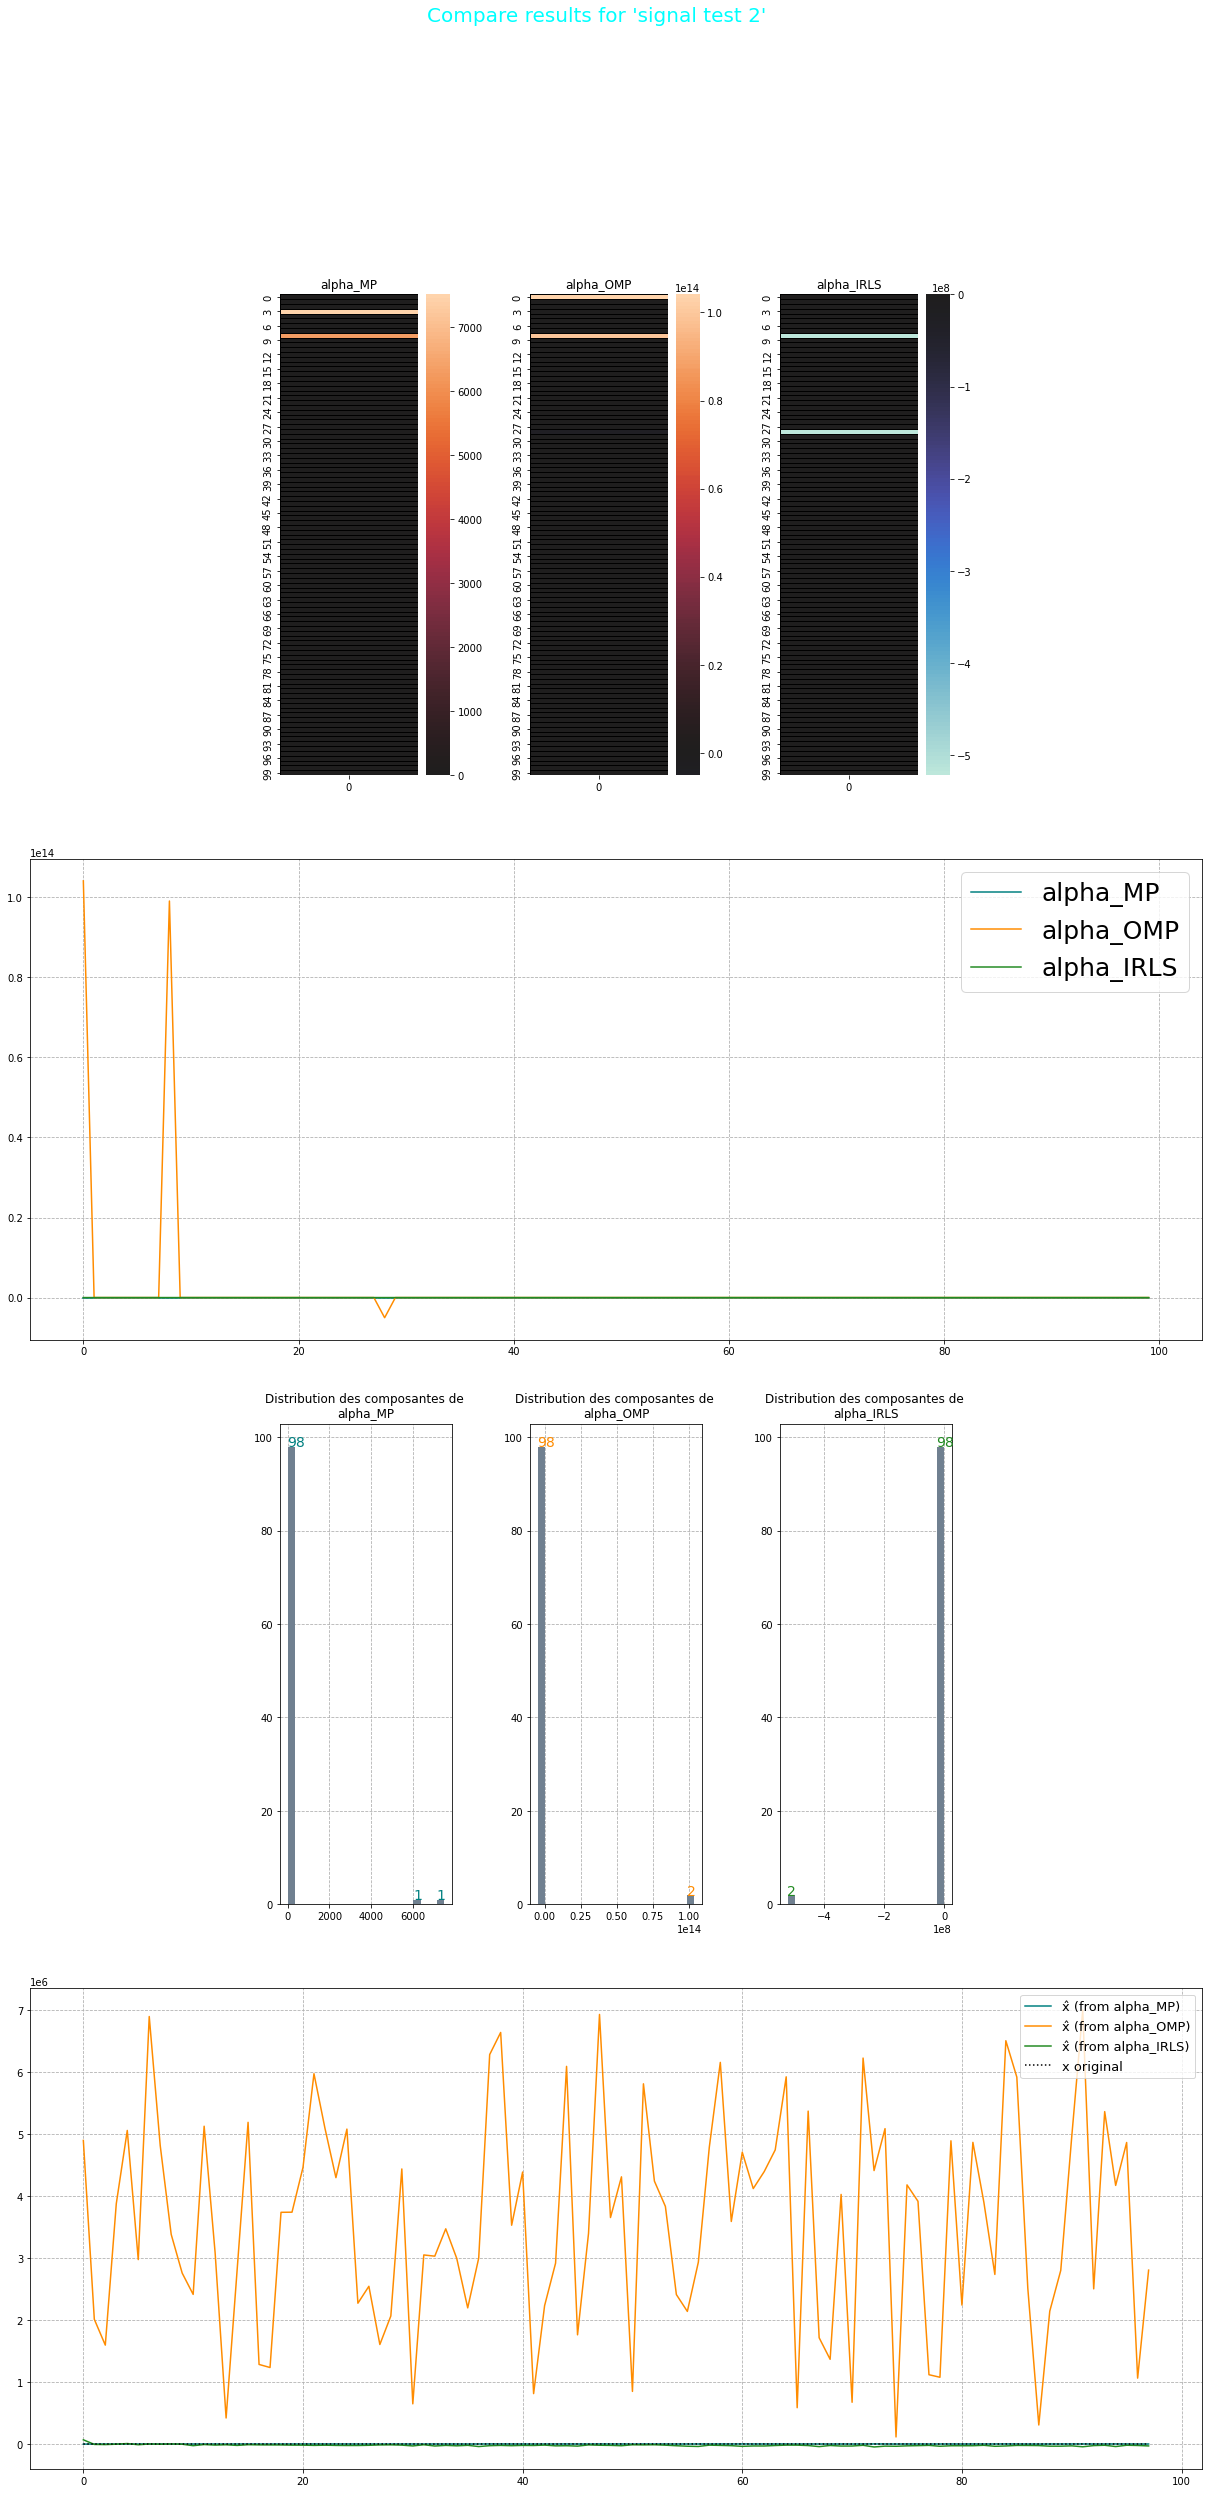

In [62]:
print("#" * 20, f"* COMPARE ALPHA RESULTS :", "#" * 20, "\n")
COLOR_F = {"MP" : "teal","OMP" : "darkorange","IRLS" : "forestgreen"}

for n, x in enumerate(test_signals):
    fig = plt.figure(figsize=(21, 40))
    figTitle = f"Compare results for 'signal test {n}'"
    fig.suptitle(figTitle, fontsize=20, c="cyan")
    grid = plt.GridSpec(4, 5, wspace=0.45, hspace=0.175)

    min_val, min_name = 10 ** 10, None
    print("-" * 50, f"\n • signal test {n} :")
    print("-" * 50)


    for i, (f_name, res) in enumerate(alpha_results[n].items()):

        (err,ok), alpha, hat_x = res["erreur relative"], res["alpha"], res["hat_x"]
        # Heatmap alpha
        plt.subplot(grid[0, 1 + i])
        plt.title(f"alpha_{f_name}")
        sns.heatmap(reshape(alpha), center=0, linewidths=1, linecolor='black')

        # Plot alpha
        plt.subplot(grid[1, :])
        plt.grid(linestyle='--')
        plt.plot(alpha,c=COLOR_F[f_name], label=f"alpha_{f_name}")
        plt.legend(prop={'size': 25})

        # Plot Histogramme
        plt.subplot(grid[2,1 + i])
        plt.grid(linestyle='--')
    
        your_bins = 20
        arr = plt.hist(alpha, rwidth=0.95, color="slategrey", bins=your_bins)
        for i in range(your_bins):
            nb = int(arr[0][i])
            if nb > 0:
                plt.text(arr[1][i],nb,str(nb),c=COLOR_F[f_name],fontsize=14)
    
        plt.title(f"Distribution des composantes de \nalpha_{f_name}")
       
        # Plot hat_x
        plt.subplot(grid[3, :])
        plt.grid(linestyle='--')
        plt.plot(hat_x,c=COLOR_F[f_name], label=f"x̂ (from alpha_{f_name})")
        #plt.legend(prop={'size': 13})

        print(f" {f_name :>5} : erreur relative = {err :> 18} ({ok})")
        epsi = 10 ** -10
        print(f"         eval(α, epsi={epsi}) -> {eval_parcim(alpha, epsilon=epsi) :>4}")
        print(f"    -- ")

        if err <= min_val:
            min_val = err
            min_name = f_name

    # Plot x on 
    plt.subplot(grid[3, :])
    plt.plot(x,":",c="black", label=f"x original")
    plt.legend(prop={'size': 13})
    print("\n *** The winner is", min_name, f"! ***")

    plt.show()
    plt.close(fig)
    strFile = f"{figTitle}.png"
    if os.path.isfile(strFile):
        os.remove(strFile)
    fig.savefig(figTitle, dpi=200) #Cette commande n'écrase pas ! Supprimer
    print()

# $\textbf{4/ Matrices de mesure}$

Nous allons utiliser le dictionnaire obtenu dans la partie précédente pour reconstruire un signal à partir
d’une acquisition comprimée grâce à l’une des matrices de mesure vues en cours.

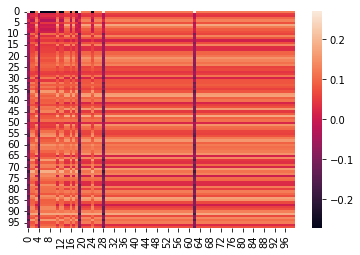

In [63]:
sns.heatmap(D_ksvd_result)

## 1. Choix d'une matrice de Mesure

**Justification du choix**

Pour que le codage soit bon, il faut que la matrice d’observation $\Phi$ “explore” toutes les colonnes du dictionnaire $Ψ$, ce que permet généralement une matrice aléatoire.

Il faut que les éléments de la matrice d’observation $\phi$ ne puissent pas être représentés parcimonieusement sur le dictionnaire $Ψ$ de décomposition parcimonieuse du signal, et inversement. Ceci peut se mesurer à l’aide de la cohérence mutuelle, définie comme ceci :
- Cohérence mutuelle entre $\gamma$ et $\phi$ : $\mu(\gamma,\phi) = \sqrt{N} \cdot  max \frac{|<\gamma_{i,\bullet}, \phi_{\bullet,j}>|}{\left \| \gamma_{i,\bullet} \right \| \cdot \left \| \phi_{\bullet, j} \right \| }$

In [64]:
def coherence_mutuelle(Phi,D):
    m, N = Phi.shape
    n, L = D.shape
    matCM = np.zeros((m, L))
    
    for i in range(m):
        for j in range(L):
            matCM[i, j] = abs(Phi[i,:]@D[:, j]) / (norm(Phi[i, :], 2) * norm(D[:, j], 2))
    #sns.heatmap(matCM)
    #plt.show()
    return np.sqrt(N) * matCM.max()

- $ \Phi_1 $ : matrice aléaoire générée à partir d'un processus uniformément distribué : $U(0,1)$ 
- $ \Phi_2 $ : matrice aléaoire générée à partir d'un processus bernoullien $\{-1,1\}$ : $B(p) \rightarrow -1$ ou $1$ 
- $ \Phi_3 $ : matrice aléaoire générée à partir d'un processus : $B(p) \rightarrow 0$ ou $1$ 
- $ \Phi_4 $ : matrice aléaoire générée à partir d'un processus : $N(0;\frac{1}{M})$ 
- $ \Phi_5 $ : matrice creuse (parcimonieuse) générée de façon aléaoire

In [65]:
NNN = test_signals[0].shape[0]  # taille de signal
print(f"Taille des signals : {NNN}")

Taille des signals : 98


10 done.
25 done.
50 done.
75 done.
90 done.


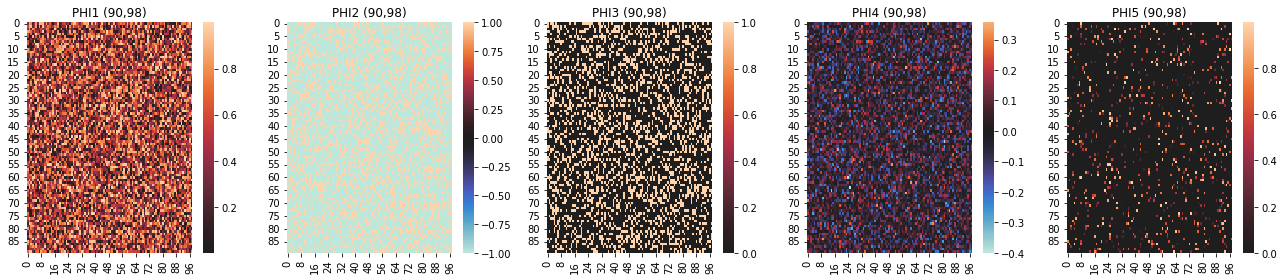

In [68]:
np.random.seed(123)

coh1 = {} # Pour M : calcule cohérence de Ph1 avec D ksvd
coh2 = {}
coh3 = {}
coh4 = {}
coh5 = {}

for M in [10,25,50,75,90]:
    Phi1 = np.random.rand(M,NNN)
    prob = 0.3
    Phi2 = np.random.choice([-1,1],p=[1-prob,prob],size=(M,NNN))
    Phi3 = np.random.binomial(1,prob,size=(M,NNN))
    Phi4 = np.random.normal(0,1/np.sqrt(M), size=(M,NNN))
    Phi5 = sparse.random(M,NNN,density=0.1).toarray()

    plt.figure(figsize=(18,4))
    for _,(Phi,coh) in enumerate(zip([Phi1, Phi2, Phi3, Phi4, Phi5],[coh1,coh2,coh3,coh4,coh5])):
   

        # calcul de la cohérence mutuelle
        coh[M] =  coherence_mutuelle(Phi, D_ksvd_result)
    
        # HeatMap Phi
        plt.subplot(1,5,_+1)
        plt.title(f"PHI{_+1} ({M},{NNN})")
        sns.heatmap(Phi, center=0)

    print(M,"done.")
    plt.tight_layout()
    plt.show()

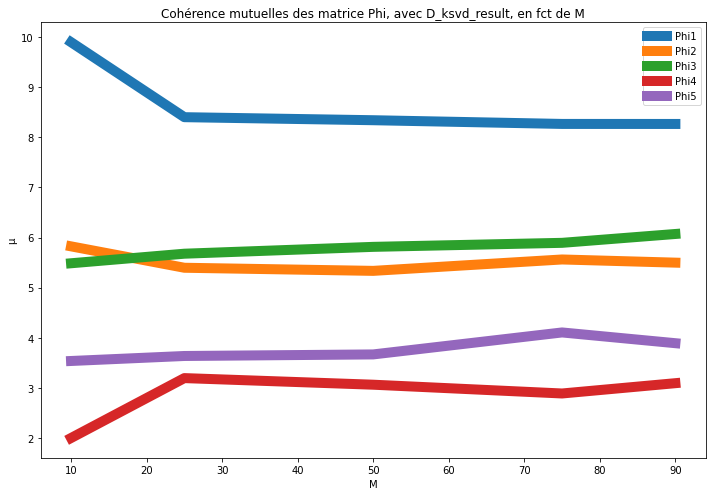

In [69]:
plt.figure(figsize=(10,7))
plt.title("Cohérence mutuelles des matrice Phi, avec D_ksvd_result, en fct de M")
for _,coh in enumerate([coh1,coh2,coh3,coh4,coh5]):
   
    plt.plot(list(coh.keys()), list(coh.values()),linewidth=10, label=f"Phi{_+1}" )

plt.ylabel("μ")
plt.xlabel("M")
plt.tight_layout()
plt.legend()
plt.show()

Nous avons choisi la matrice $\Phi_4$ : matrice aléatoire obtenu par un schéma de loi normale $N(0,\frac{1}{M})$

car - parmi toutes les 5 matrices - elle est la moins cohérente avec la matrice $D$ (obtenu par k-svd).

In [70]:
M = 90 # taille des mesures choisie, avec M≪N.
print(f"Taille des mesures choisie (avec M≪N) : {M}")

Taille des mesures choisie (avec M≪N) : 90


Voir le rapport

## 2. Compressed Sensing appliqué aux 3 signaux test et evaluation de la qualité de reconstruction

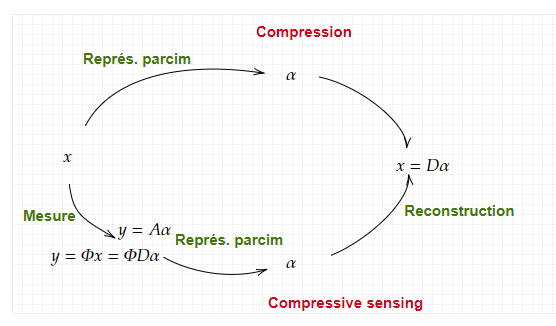

1. calcul de $y = \Phi x$ 
2. obtenir D : k-svd
3. obtenir $\alpha$ : Appliquer OMP sur y avec notre dictionnaire D
4. $\tilde x = D \alpha$

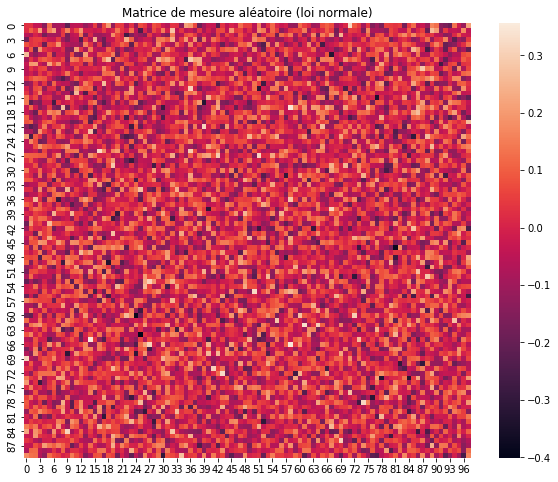

In [71]:
plt.figure(figsize=(10,8))
plt.title("Matrice de mesure aléatoire (loi normale)")
sns.heatmap(Phi4)
plt.show()

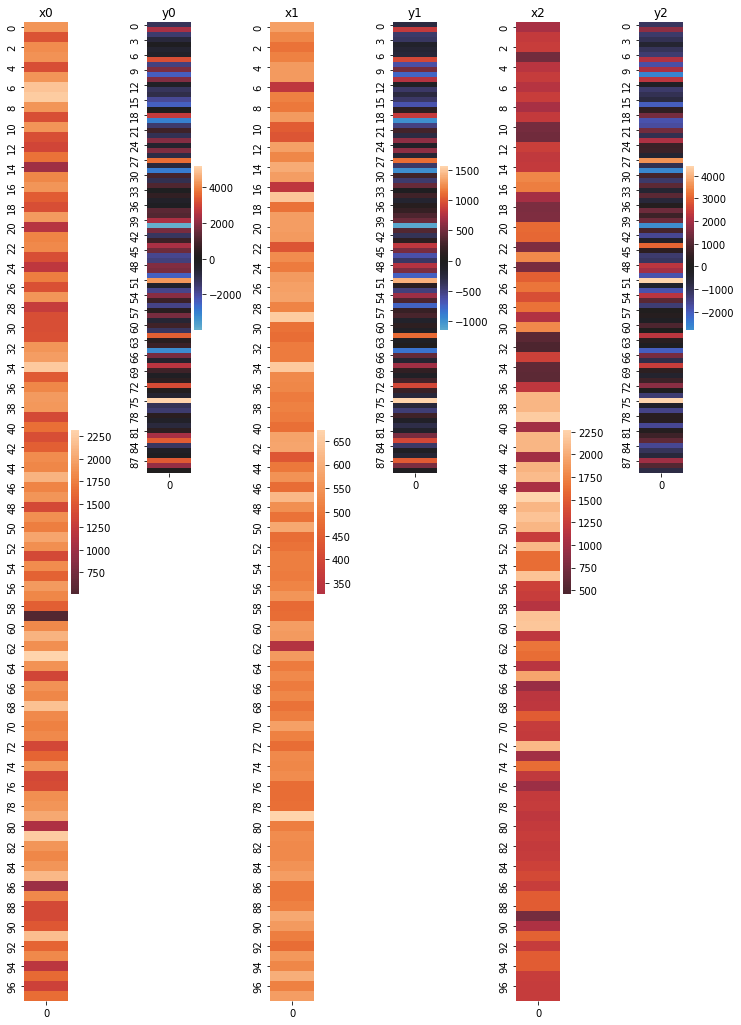

In [72]:
plt.figure(figsize=(12,18))
grid = plt.GridSpec(2, 6, wspace=1.25, hspace=0.17)
test_signals_mesure = []
for n, x in enumerate(test_signals):
    # Une première visualisation pour comparer alpha_F et alpha_OMP_F
    

    plt.subplot(grid[:,0 + (n*2)])
    plt.title(f"x{n}")
    sns.heatmap(x.reshape(len(x),1), center=0)

    y = Phi4 @ x
    
    test_signals_mesure.append(y)
    plt.subplot(grid[0,1 + (n*2)])
    plt.title(f"y{n}")
    sns.heatmap(y.reshape(len(y),1), center=0)

#grid.tight_layout()
plt.show()  

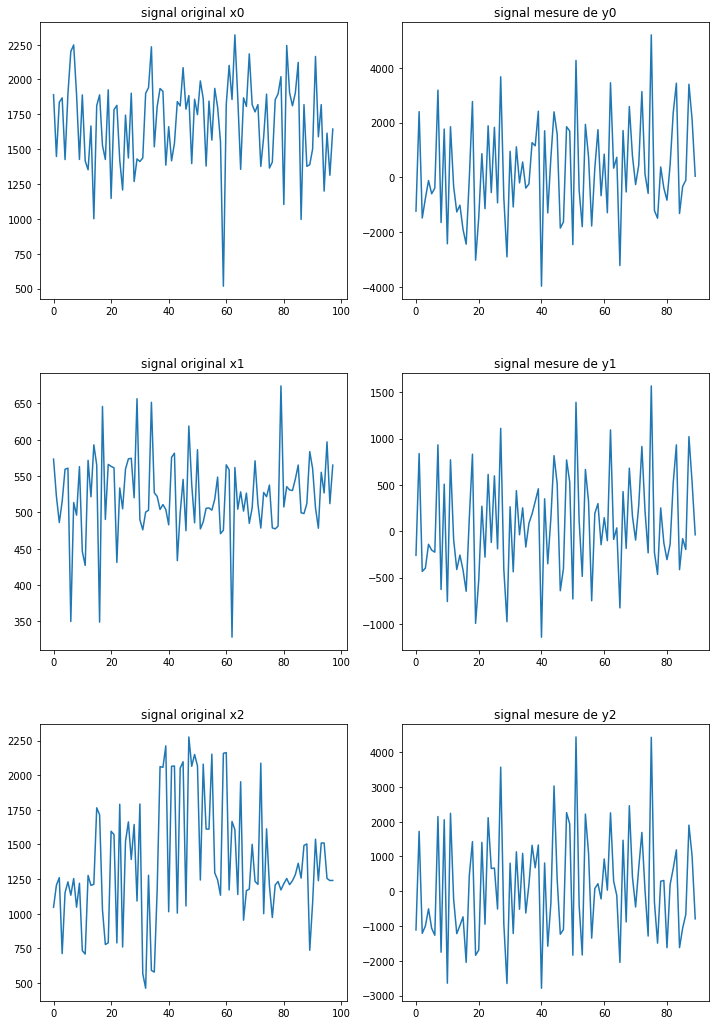

In [73]:
plt.figure(figsize=(12,18))
grid = plt.GridSpec(3, 2, wspace=0.18, hspace=0.27)

for n, (x,y) in enumerate(zip(test_signals,test_signals_mesure)):
  
    # Une première visualisation pour comparer alpha_F et alpha_OMP_F
    
    plt.subplot(grid[n,0 ])
    plt.title(f"signal original x{n}")
    plt.plot(x)

    plt.subplot(grid[n,1])
    plt.title(f"signal mesure de y{n}")
    plt.plot(y)

#grid.tight_layout()
plt.show()  

-------------------------------------------------- 
 • signal test 0 :
-------------------------------------------------- 
 • signal test 1 :
-------------------------------------------------- 
 • signal test 2 :


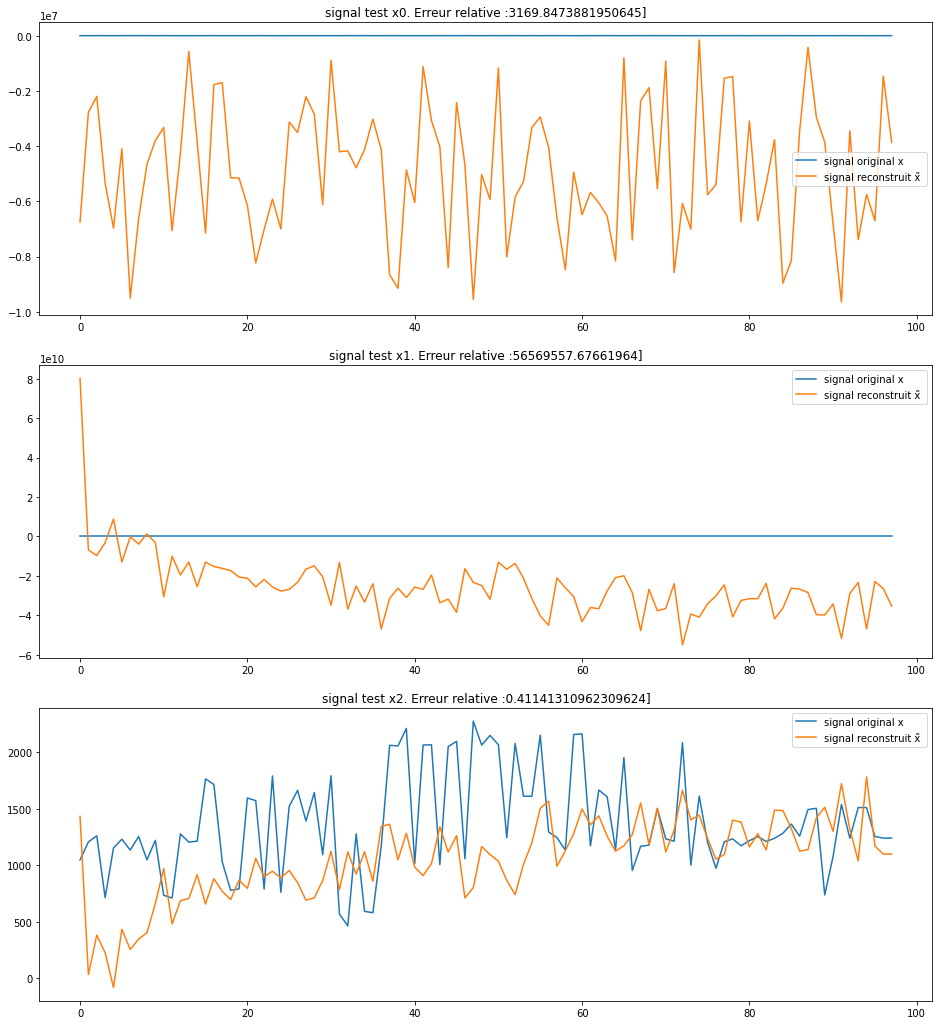

In [74]:
plt.figure(figsize=(16,18))
grid = plt.GridSpec(3, 1, wspace=1.25, hspace=0.17)

for n, (x,y) in enumerate(zip(test_signals,test_signals_mesure)):
    print("-" * 50, f"\n • signal test {n} :")
    # Une première visualisation pour comparer alpha_F et alpha_OMP_F
    
    A = Phi4 @ D_ksvd_result
    alpha = OMP(A, y, IterMax=250, verbose=False)[0]
    
    hat_x = D_ksvd_result @ alpha

    plt.subplot(grid[n,0])
    e,ok = erreur_relative(hat_x,x)

    plt.title(f"signal test x{n}. Erreur relative :{e}]")
    plt.plot(x,label="signal original x")
    plt.plot(hat_x,label="signal reconstruit x̃ ")
    plt.legend()

#grid.tight_layout()

plt.show()  